In [1]:
import pandas as pd

file_path = '/content/data_processed.csv'
data1 = pd.read_csv(file_path)

In [2]:
# Seleccionar solo las columnas numéricas del DataFrame
data = data1.select_dtypes(include='number')
#Elimina una columna en data
data = data.drop(columns=['FM Gap Time', 'FCE Waiting Time', 'FCE2 Charging Space Time'])

In [3]:
# count values de steel type
data['steel_type'].value_counts()

,count
steel_type,
2,22275
0,13797
1,13416
3,7107


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# --------- Bloque 1: Tratamiento de Outliers usando el Rango Intercuartílico (IQR) ---------

# Calcular el IQR y los límites
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers reemplazándolos con NaN
data_iqr_treated = data.mask((data < lower_bound) | (data > upper_bound))

# Rellenar los NaN resultantes si se desea, por ejemplo, usando la mediana
data_iqr_treated.fillna(data.median(), inplace=True)


# --------- Bloque 2: Tratamiento de Outliers usando Normalización ---------

# Escalar el DataFrame
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_normalized = pd.DataFrame(data_scaled, columns=data.columns)

# Opcional: Para datos escalados, puedes reemplazar los valores que estén a más de 3 desviaciones estándar de la media
# con los límites de 3 desviaciones estándar.
data_normalized[(data_normalized > 3) | (data_normalized < -3)] = np.sign(data_normalized) * 3


# --------- Bloque 3: Comparación de los Resultados ---------

# Comparación de las medias de cada método de tratamiento para observar los efectos
comparison_df = pd.DataFrame({
    "Original_Mean": data.mean(),
    "IQR_Treated_Mean": data_iqr_treated.mean(),
    "Normalized_Mean": data_normalized.mean()
})

print("Comparación de las medias antes y después de los tratamientos de outliers:")
print(comparison_df)

Comparación de las medias antes y después de los tratamientos de outliers:
                             Original_Mean  IQR_Treated_Mean  Normalized_Mean
FCE Number                        1.499655          1.499655     3.156294e-16
Slab Width                     1420.717502       1420.717502    -2.812290e-17
Slab Thickness                  219.554607        217.790211    -8.461590e-04
Slab Lenght                    9883.603993       9883.603993     2.531061e-16
Slab Weight                      23.393231         23.392682    -2.540658e-05
slab_width_charge              1075.658486       1075.658486     8.035115e-18
Commander Slab Speed             21.186792         21.172276     2.081747e-03
PC Width                       1470.735878       1470.735878    -2.430622e-16
PC Thickness                    225.089195        223.131496    -8.999329e-16
PC Length                      9586.526036       9586.907059    -6.187039e-16
Coil Thickness                    4.974317          4.395177    -1.

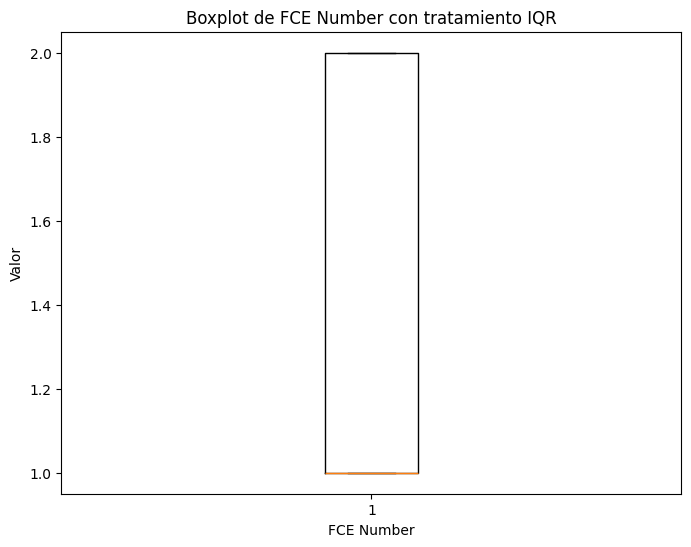

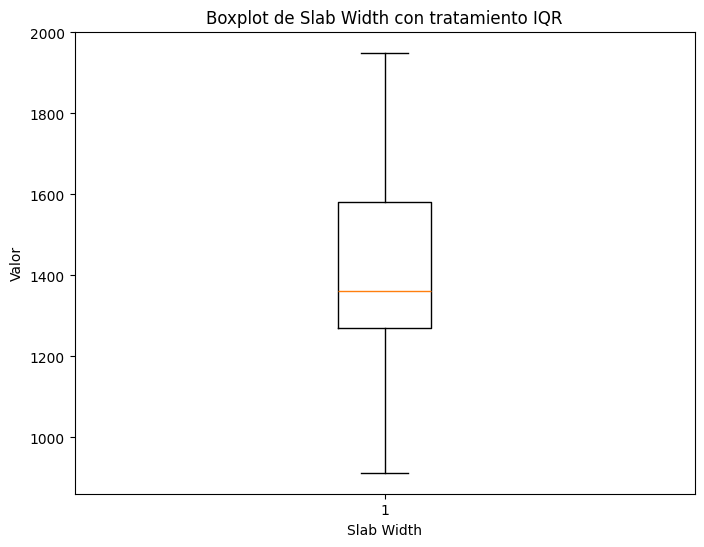

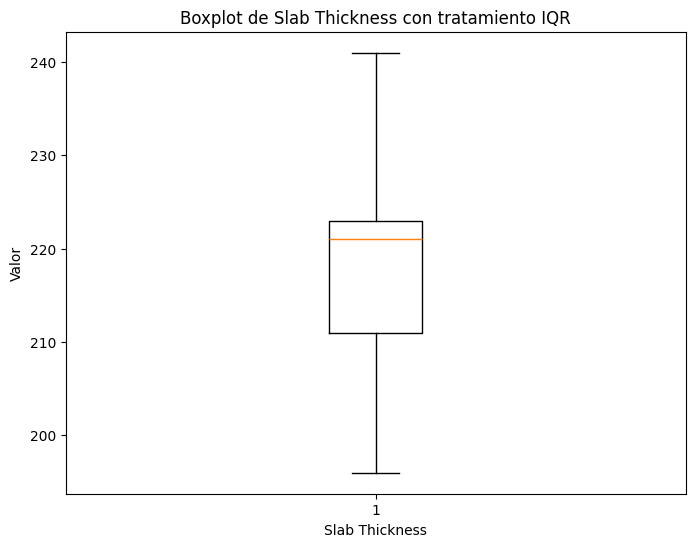

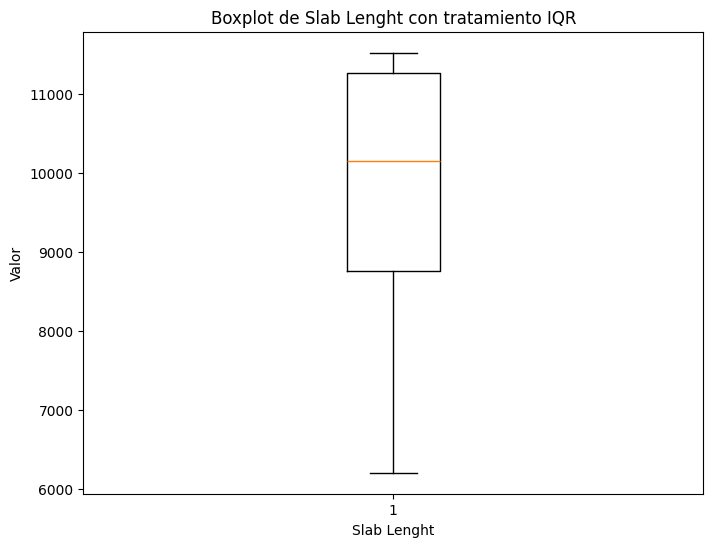

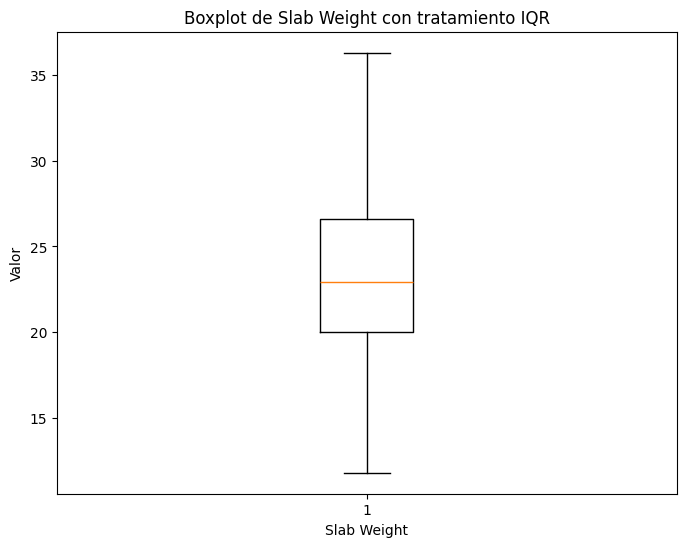

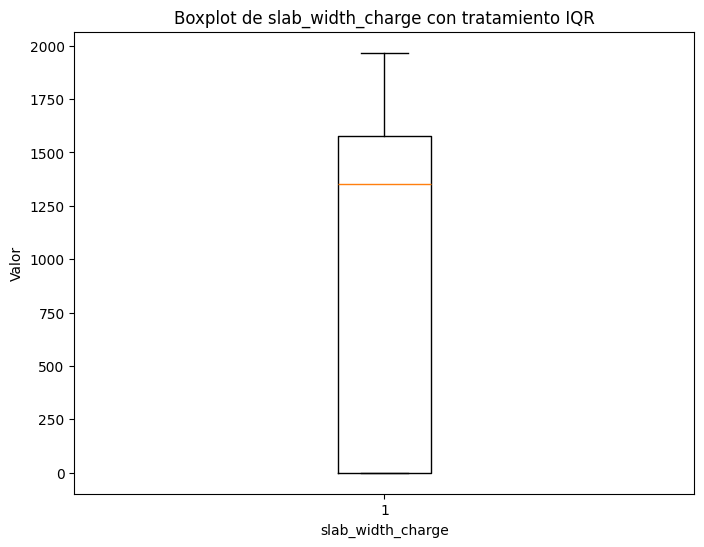

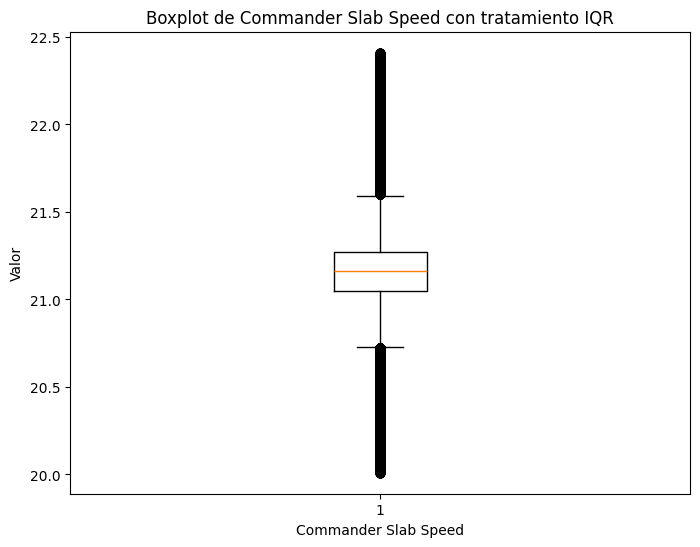

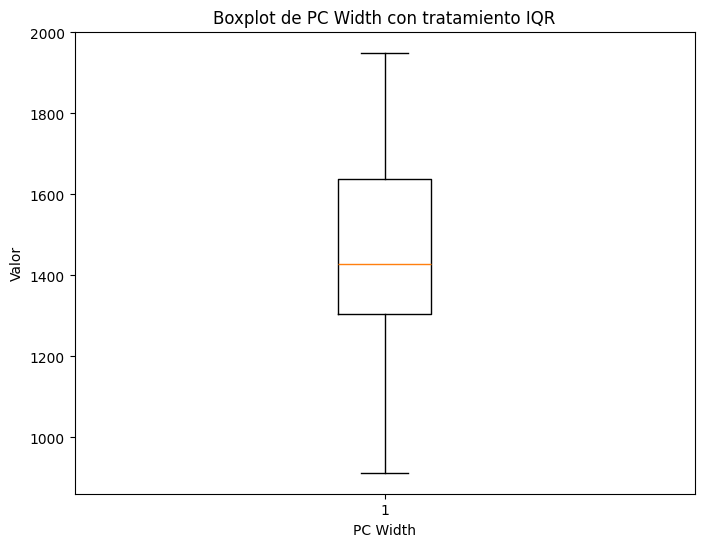

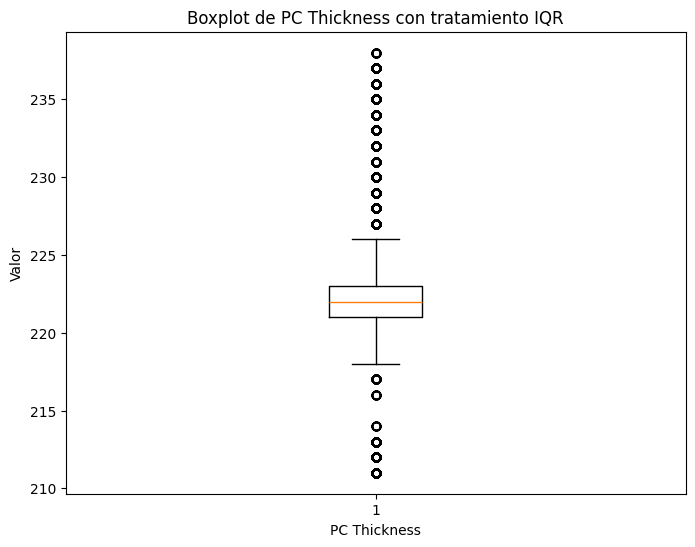

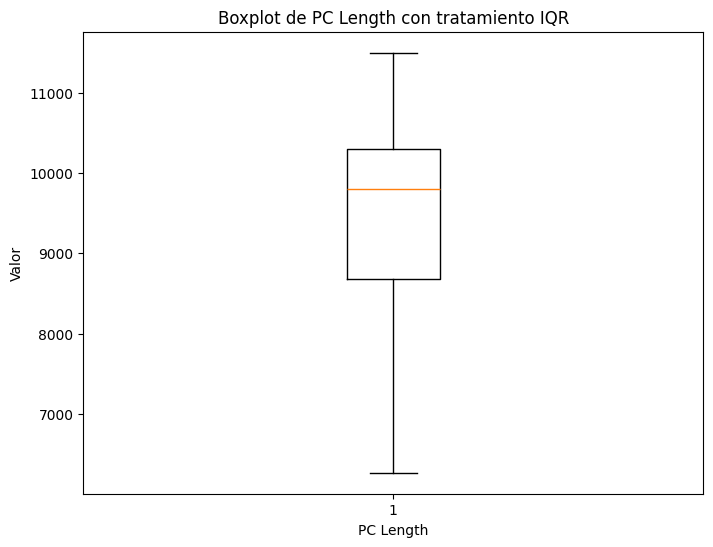

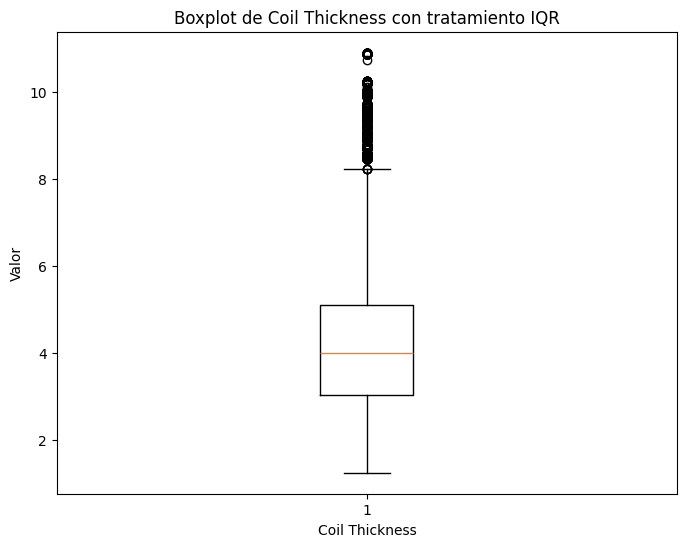

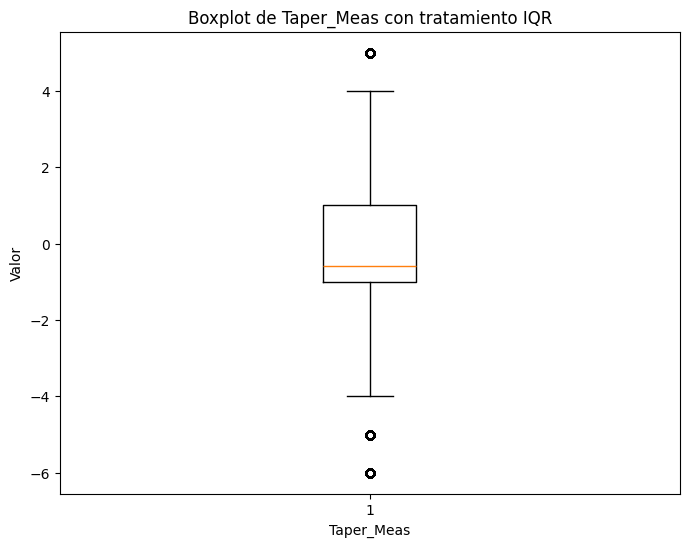

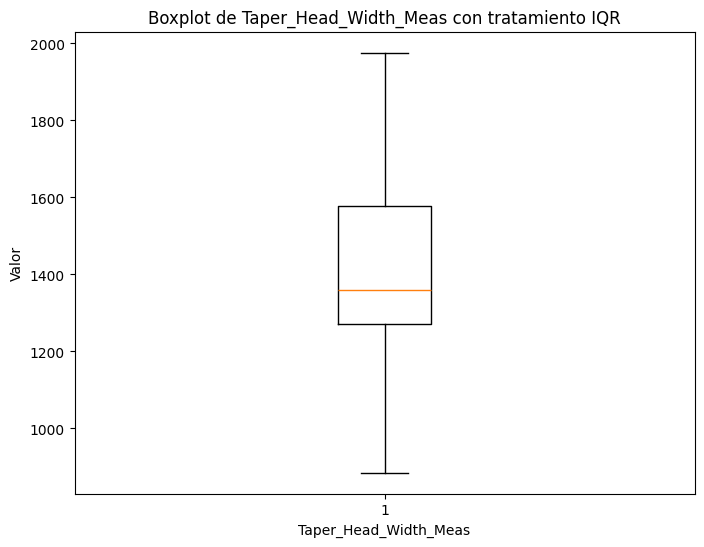

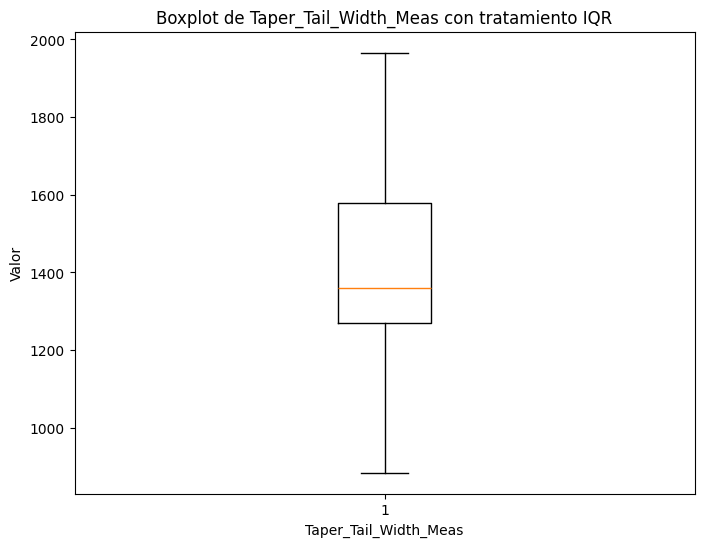

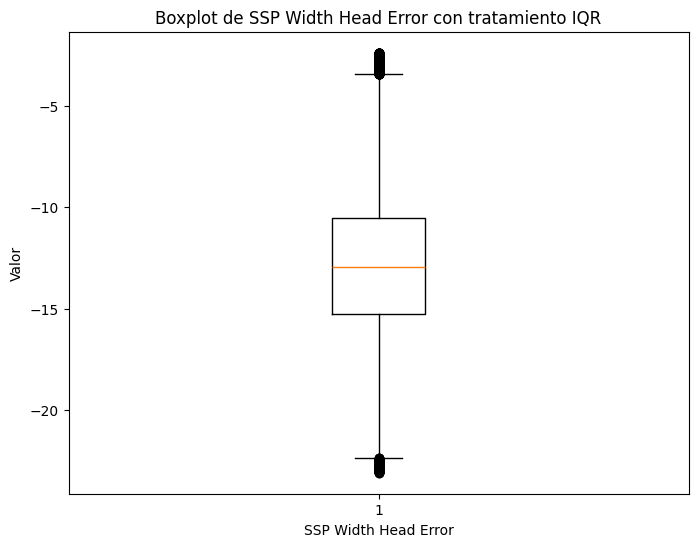

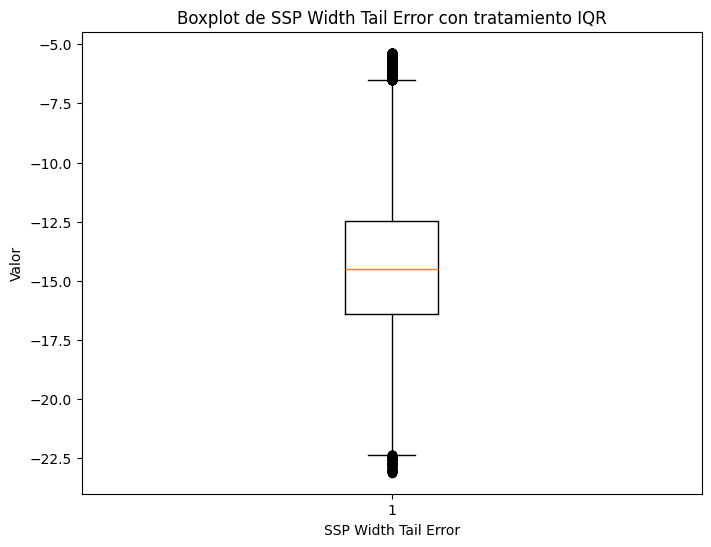

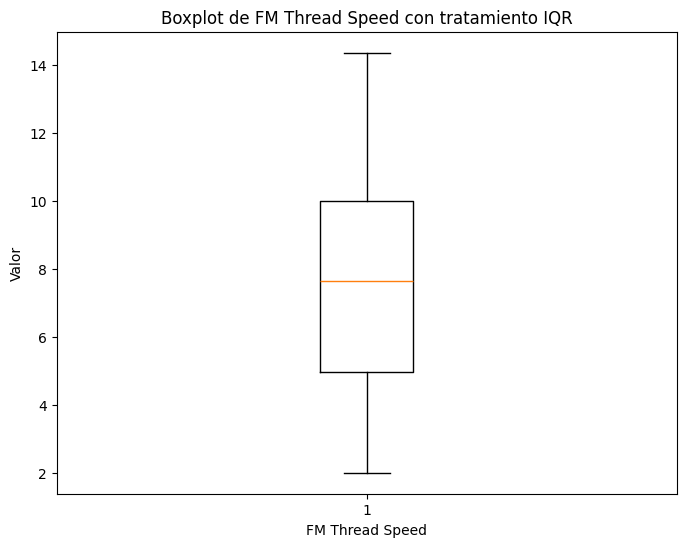

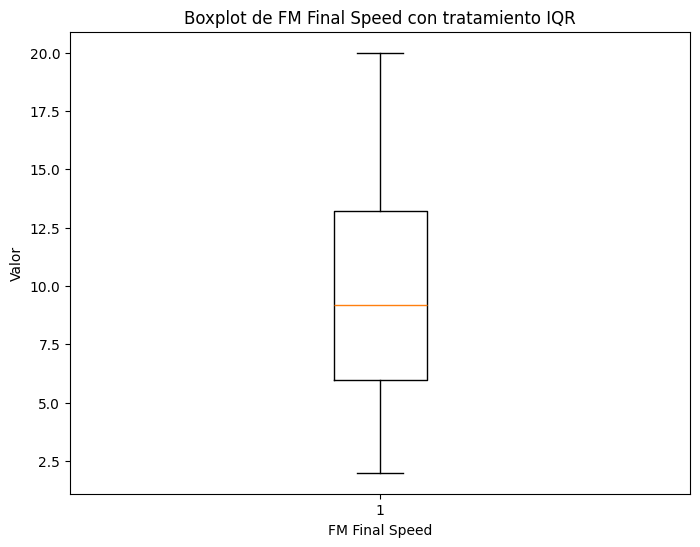

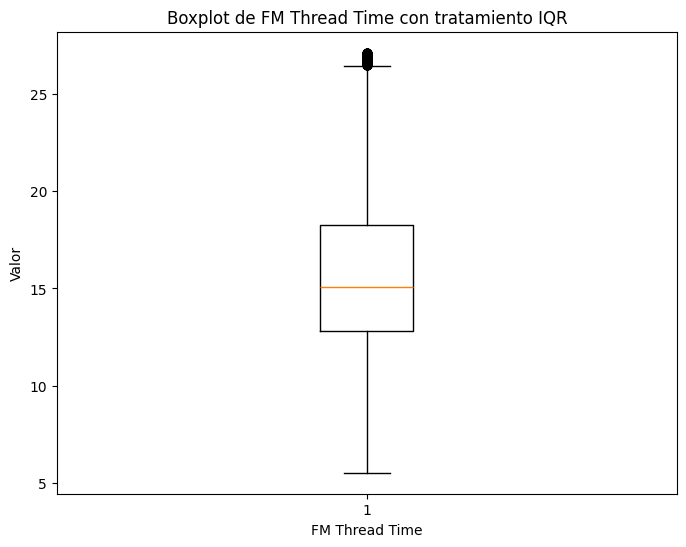

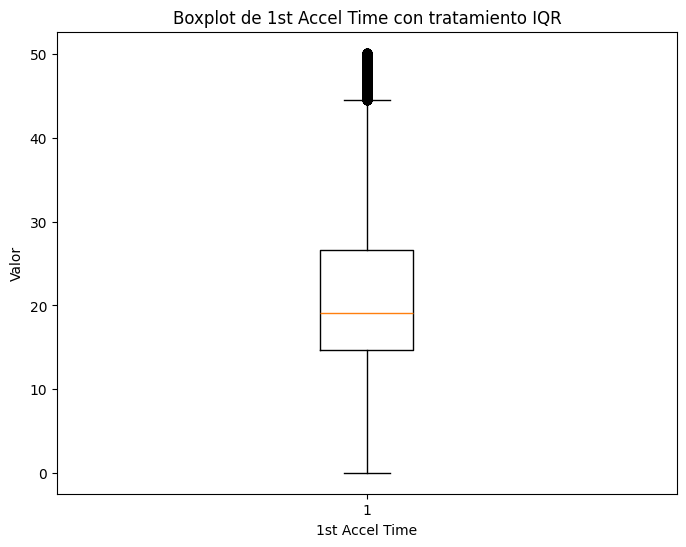

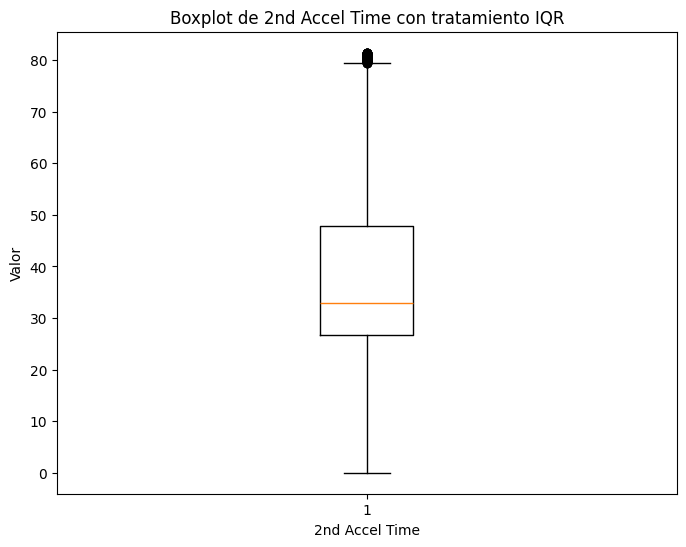

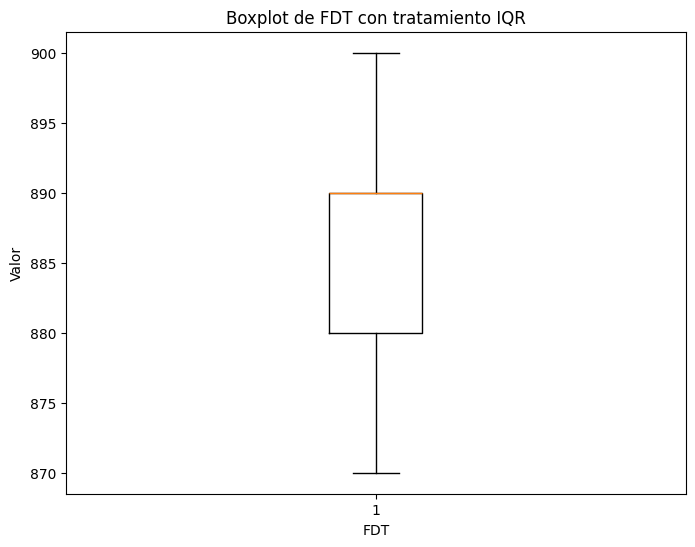

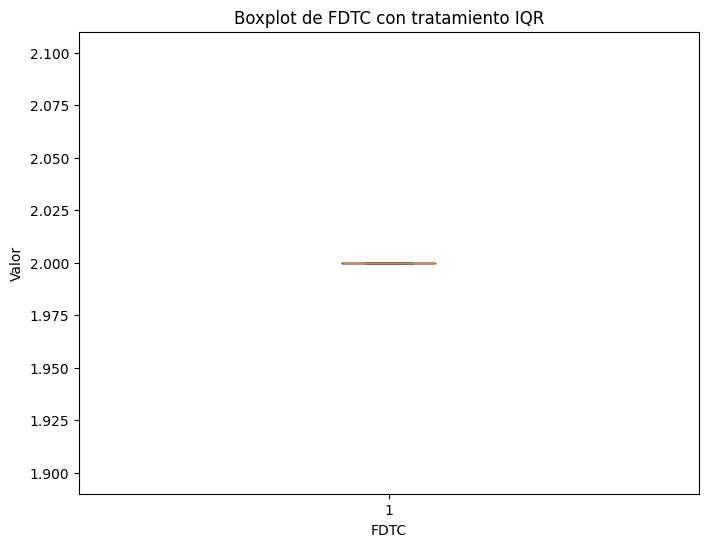

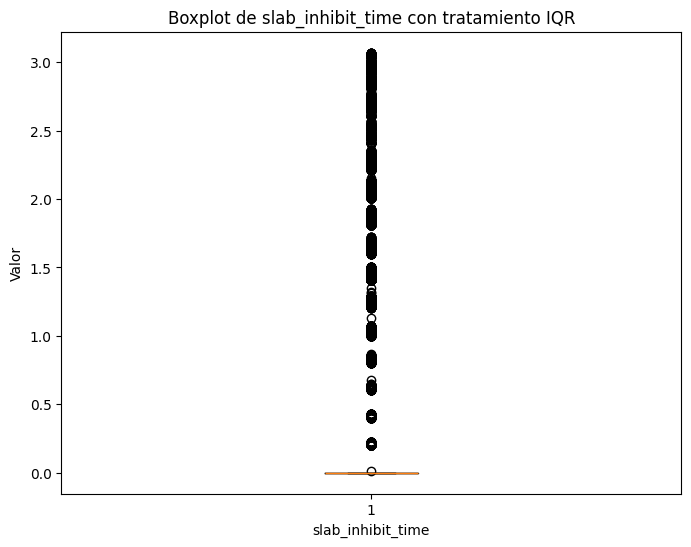

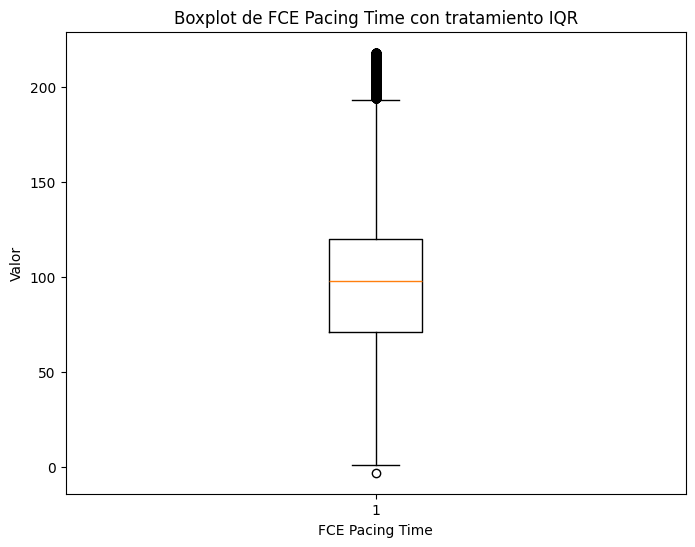

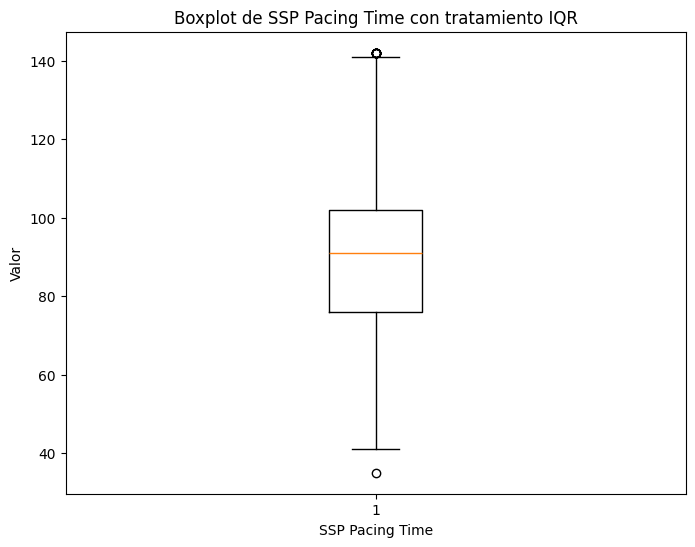

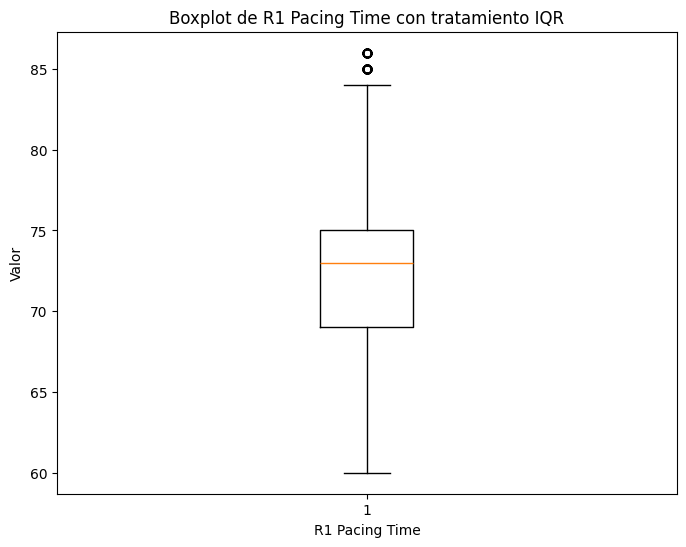

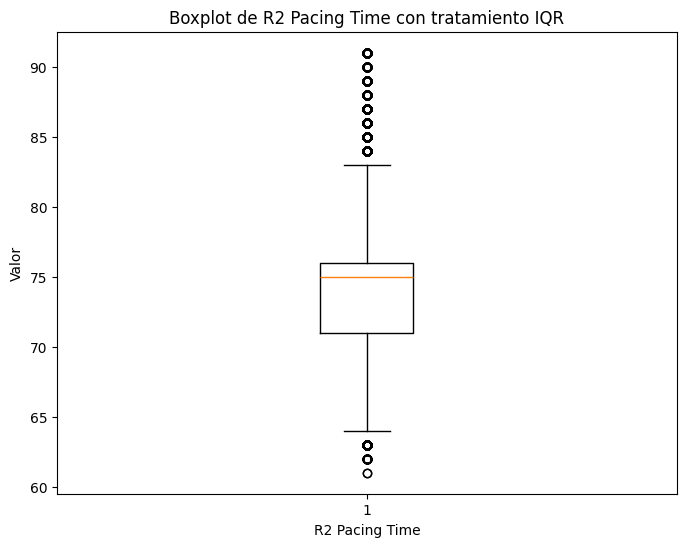

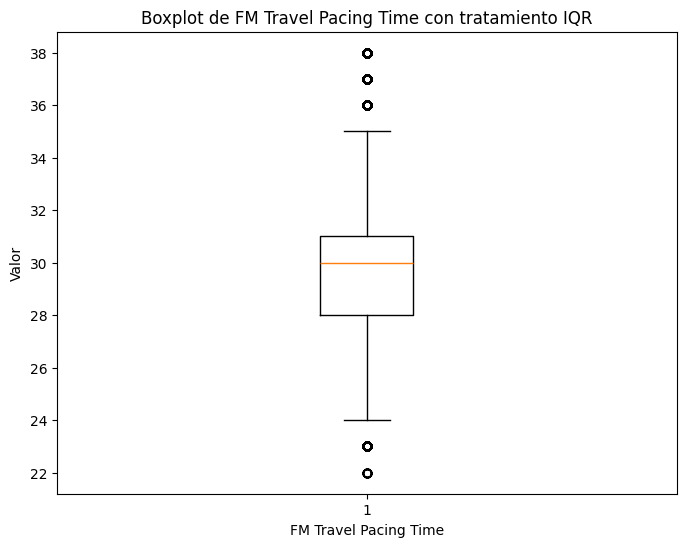

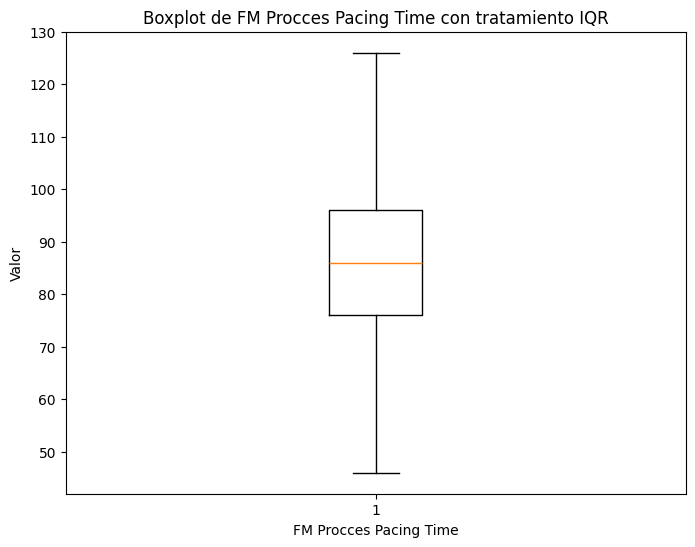

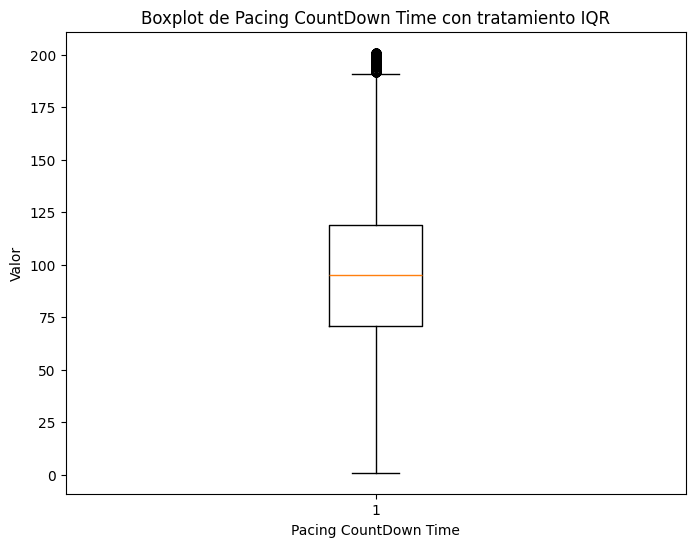

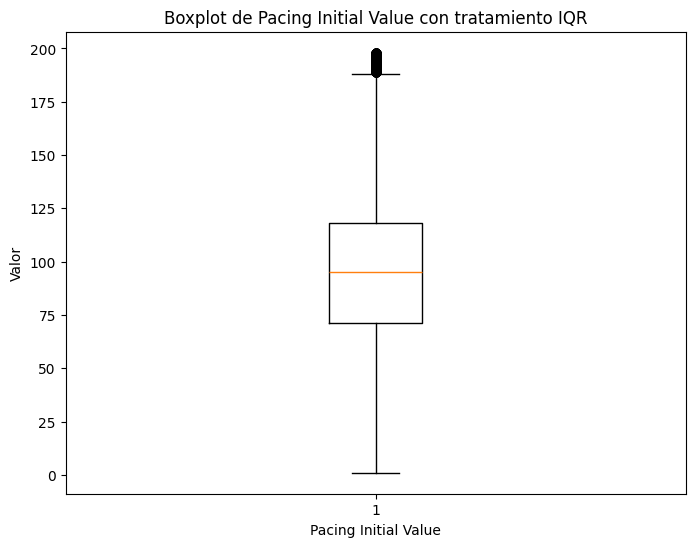

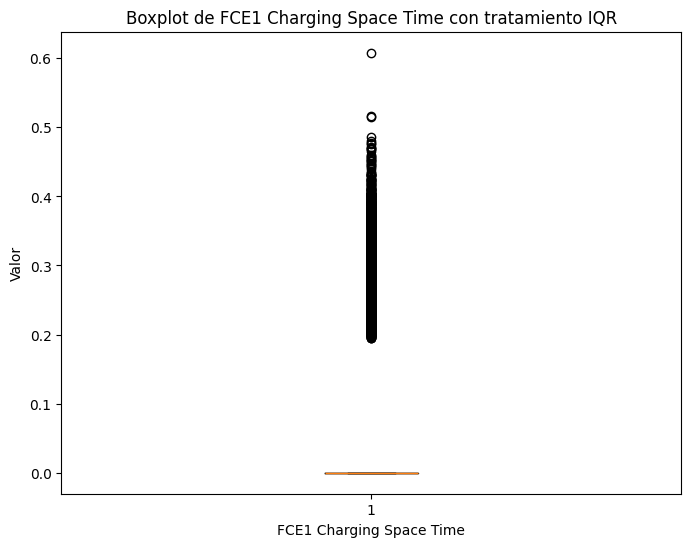

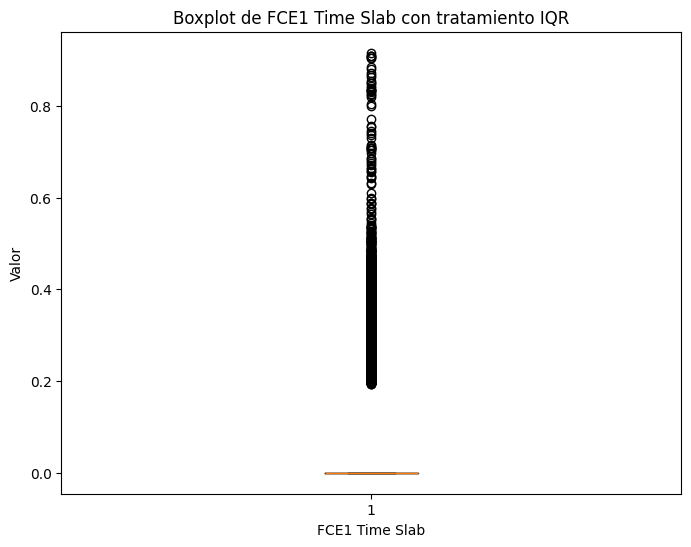

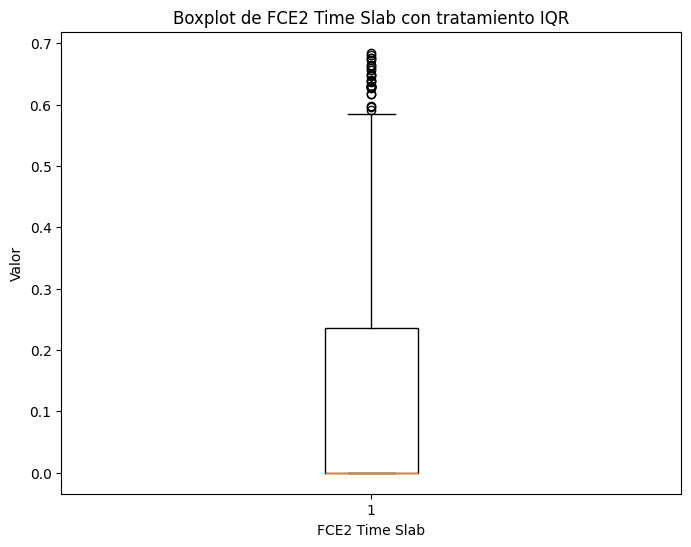

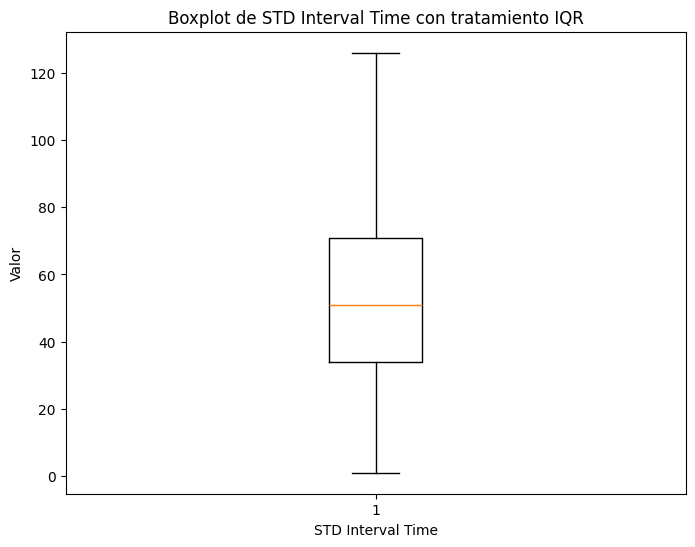

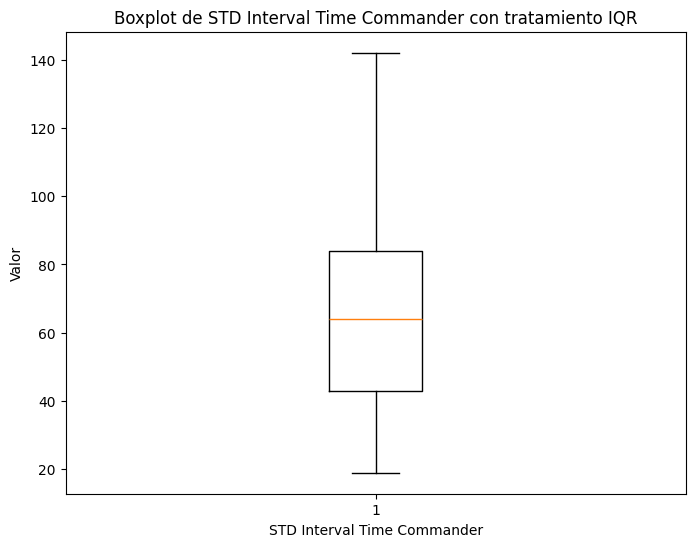

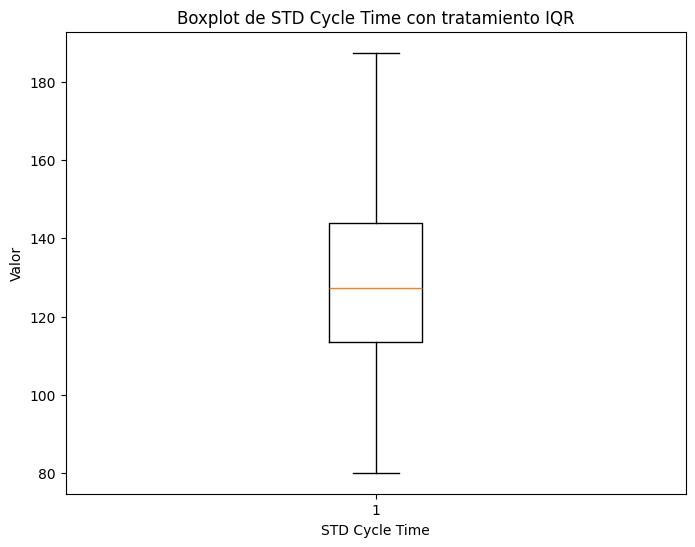

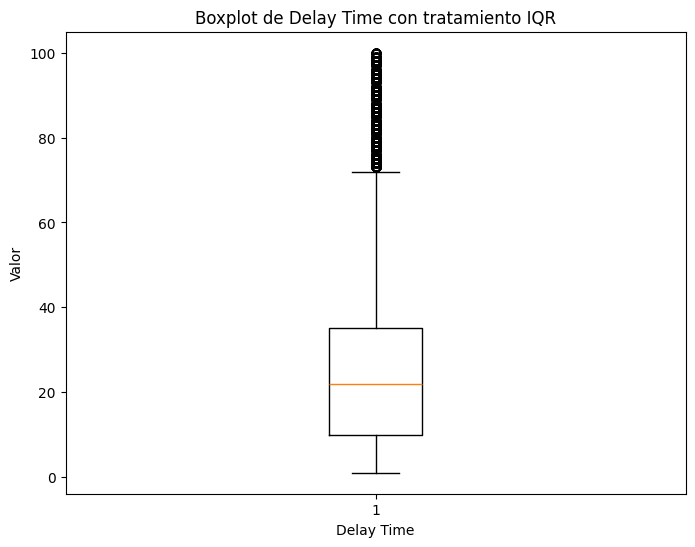

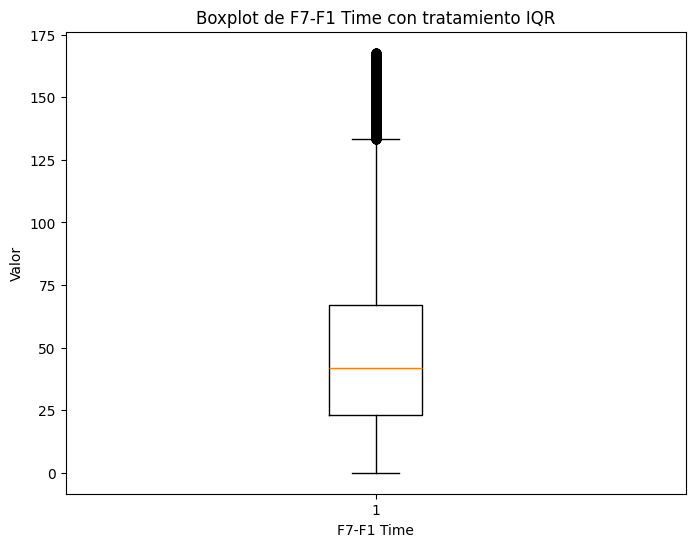

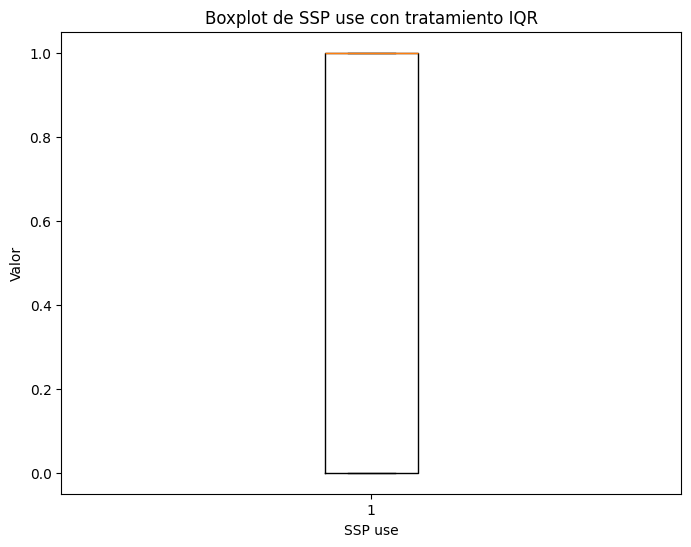

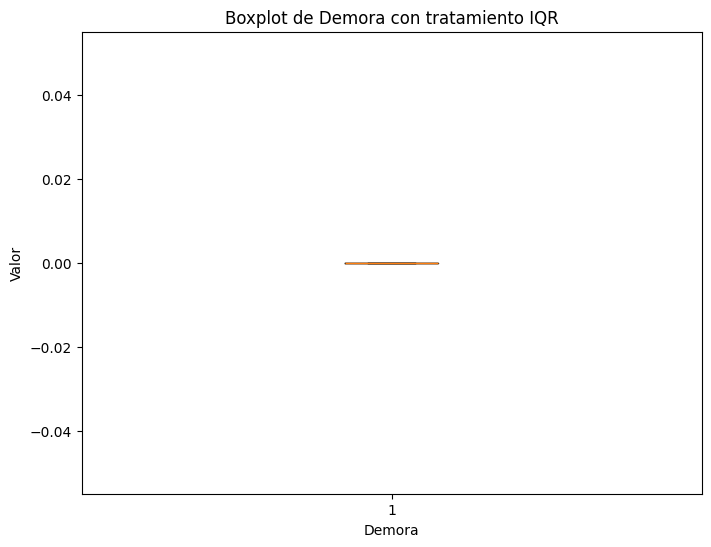

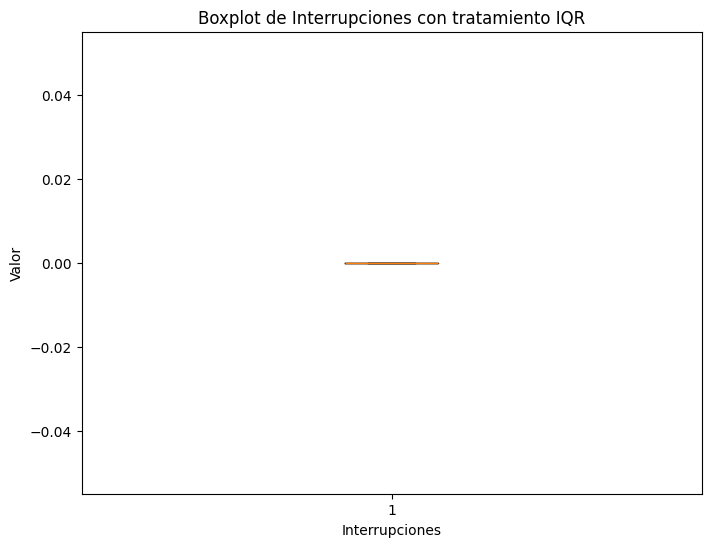

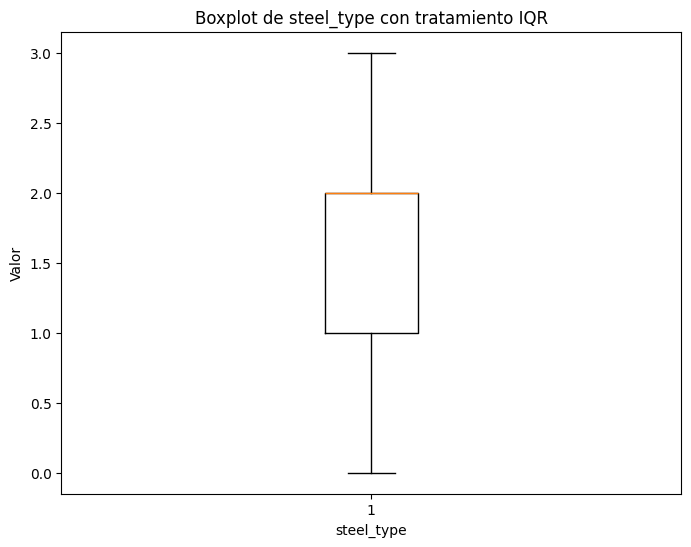

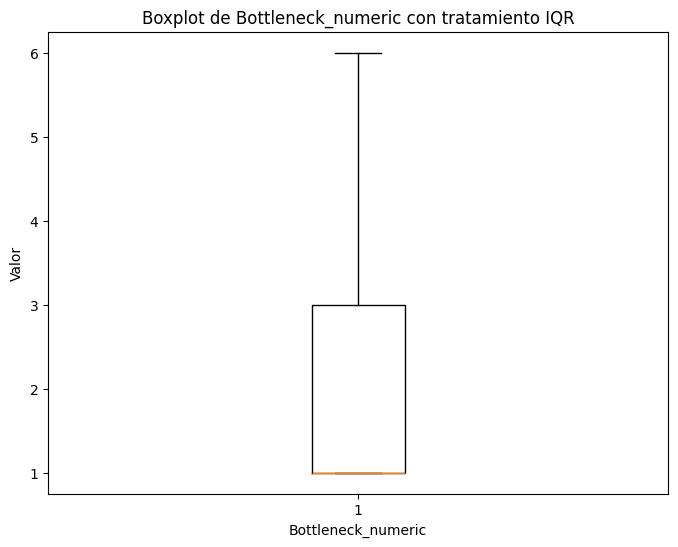

In [5]:
# prompt:  Grafica los oultiers de IQR_Treated_Mean

import matplotlib.pyplot as plt

# Obtener los outliers de IQR_Treated_Mean
outliers_iqr = data_iqr_treated[(data_iqr_treated < lower_bound) | (data_iqr_treated > upper_bound)]

# Graficar los outliers para cada columna
for column in outliers_iqr.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_iqr_treated[column])
  plt.title(f"Boxplot de {column} con tratamiento IQR")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_iqr[column][outliers_iqr[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

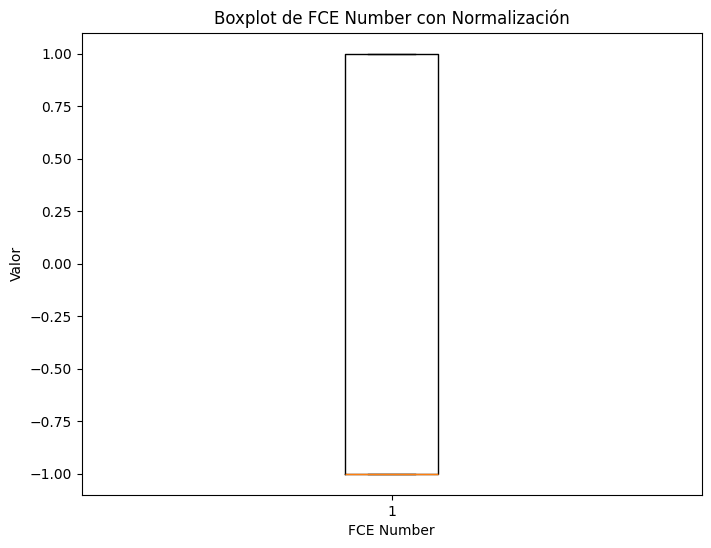

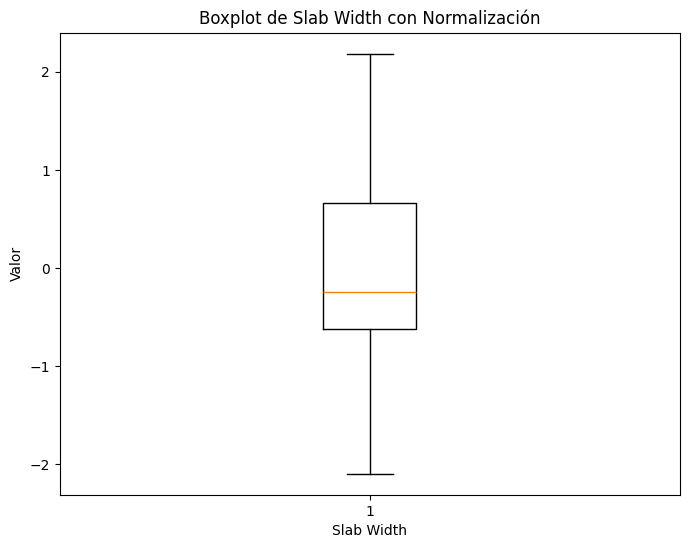

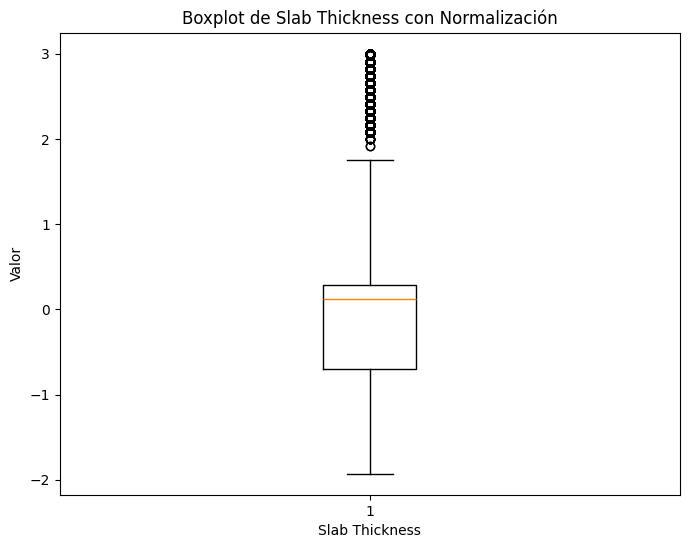

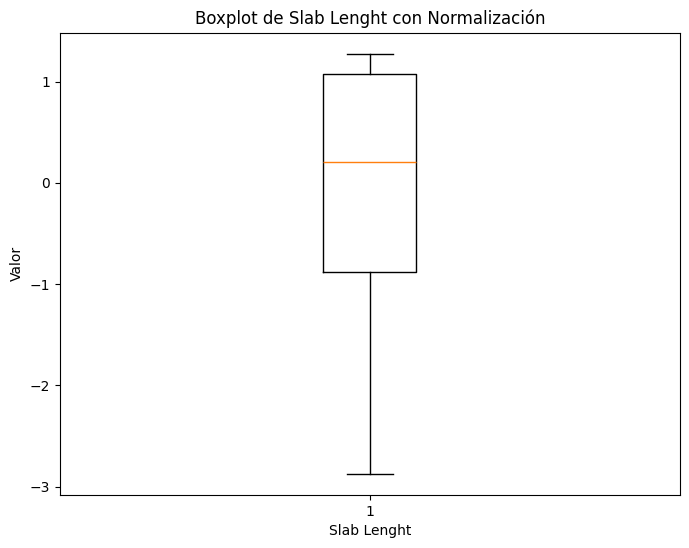

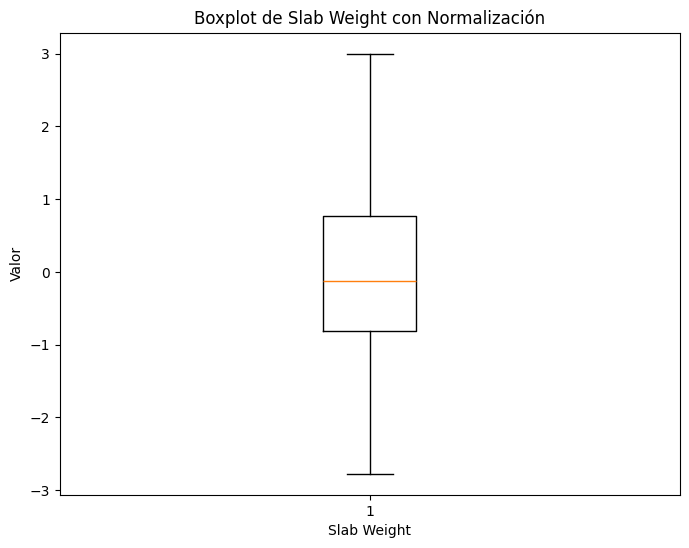

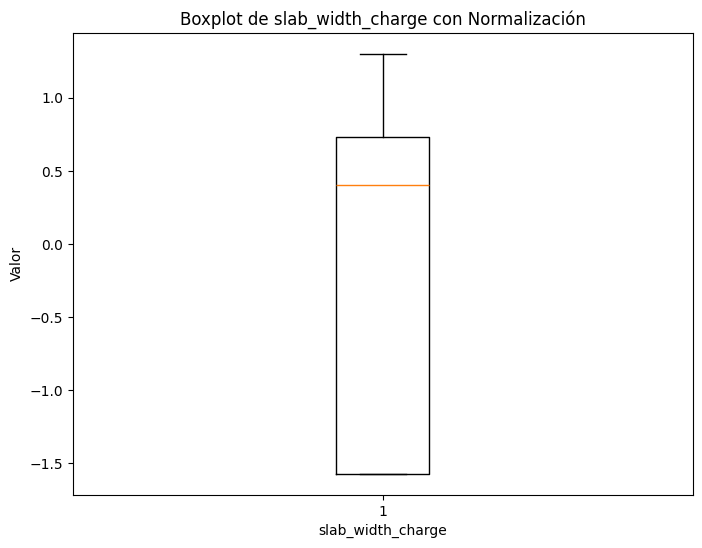

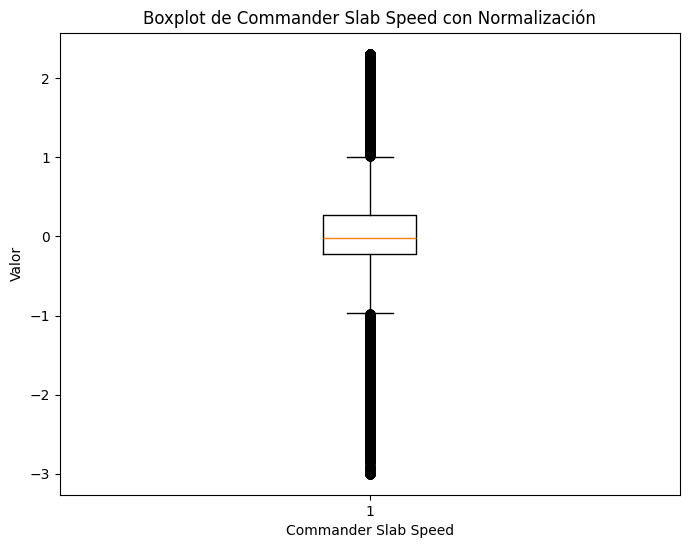

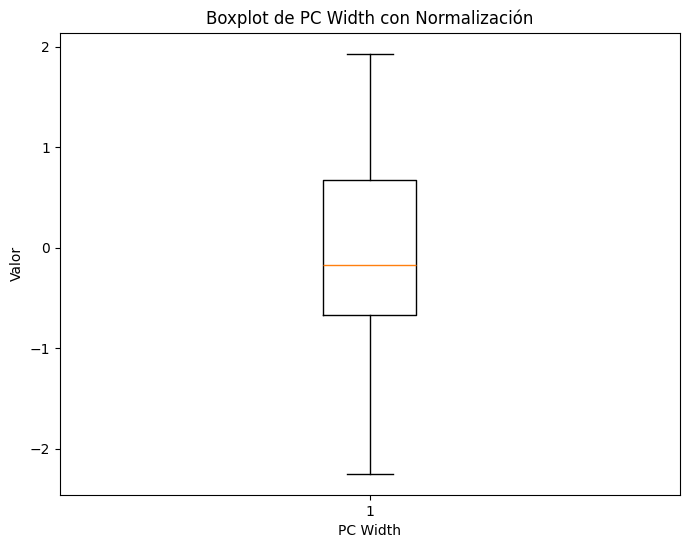

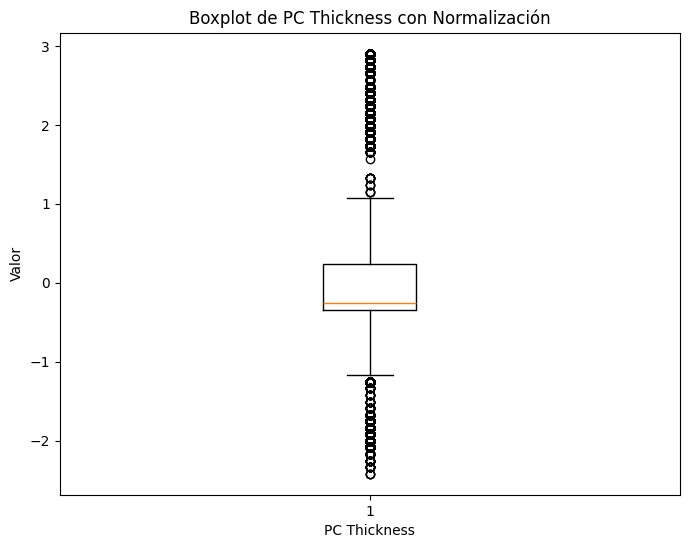

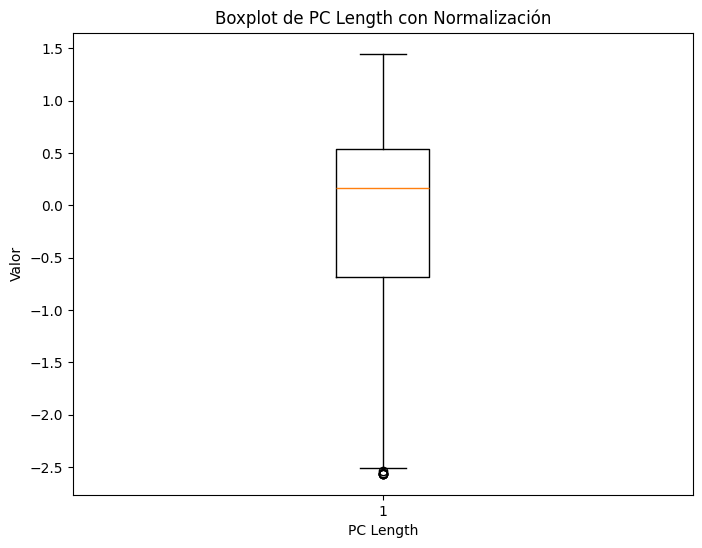

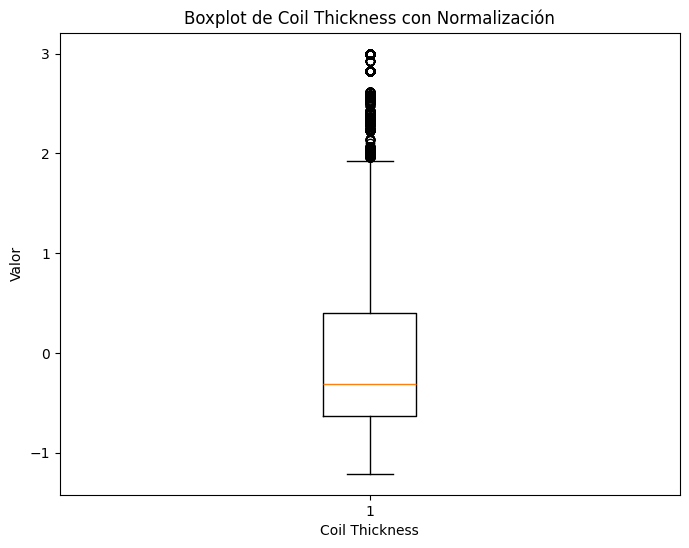

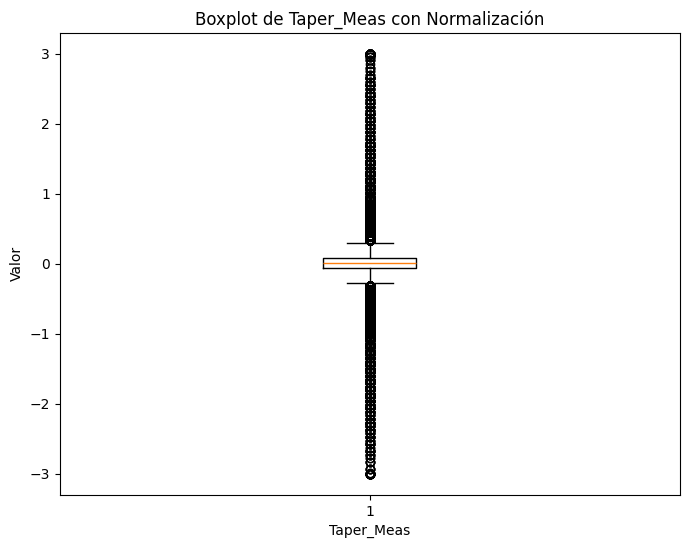

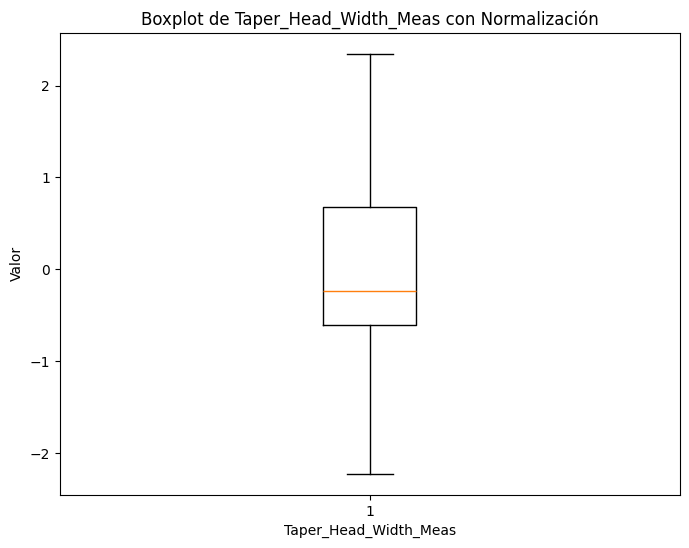

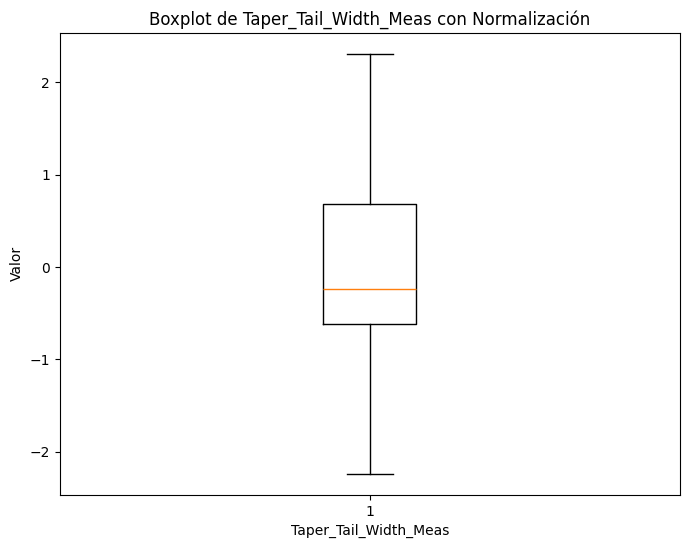

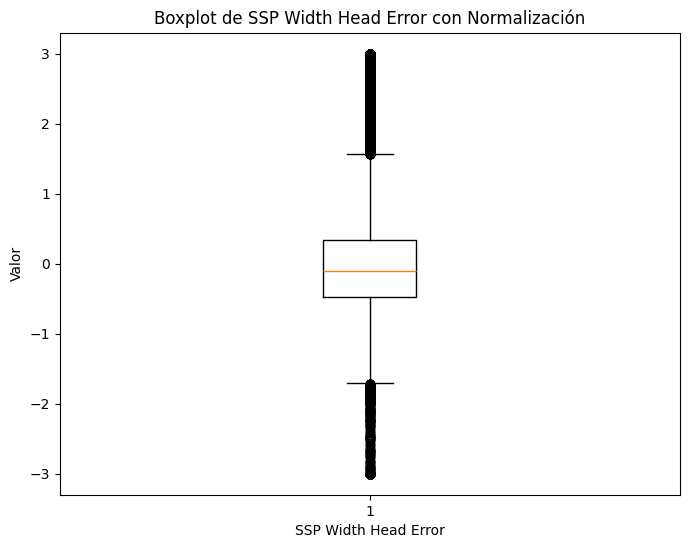

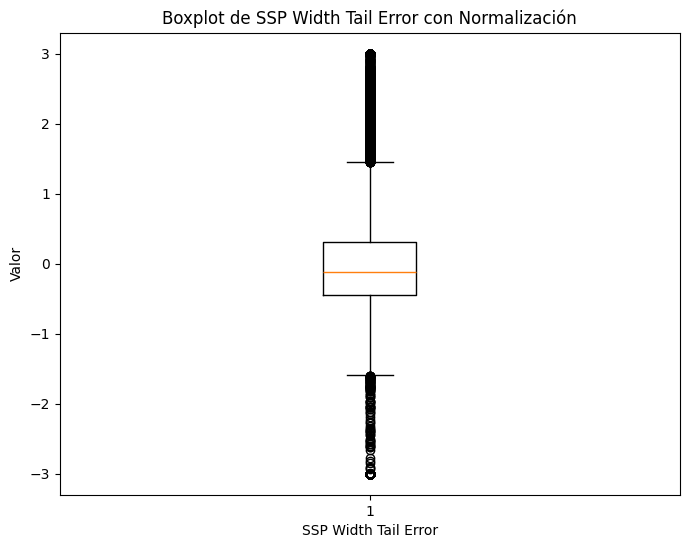

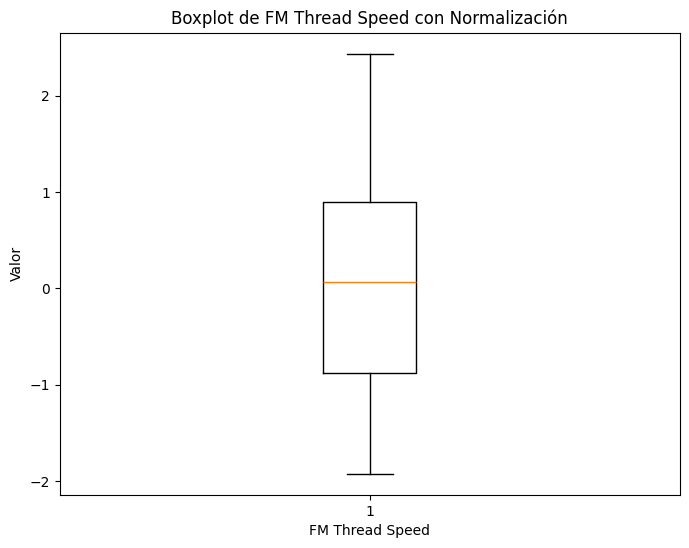

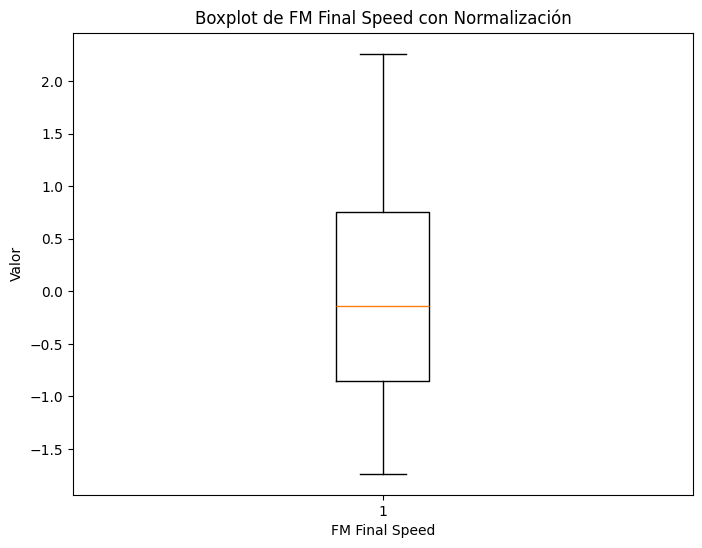

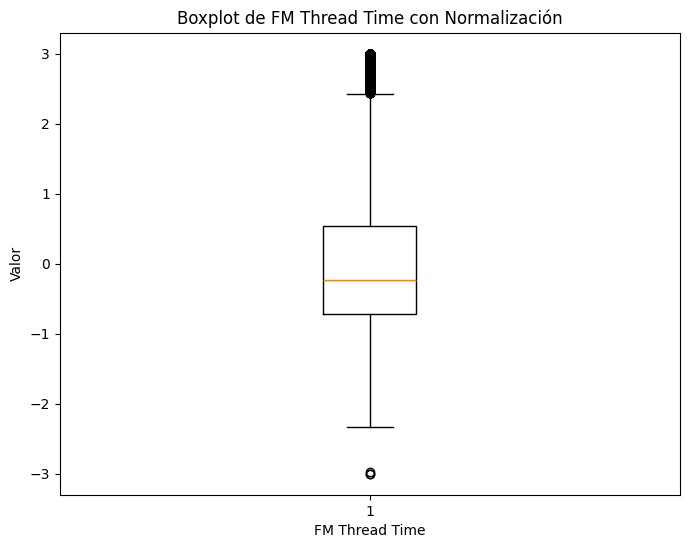

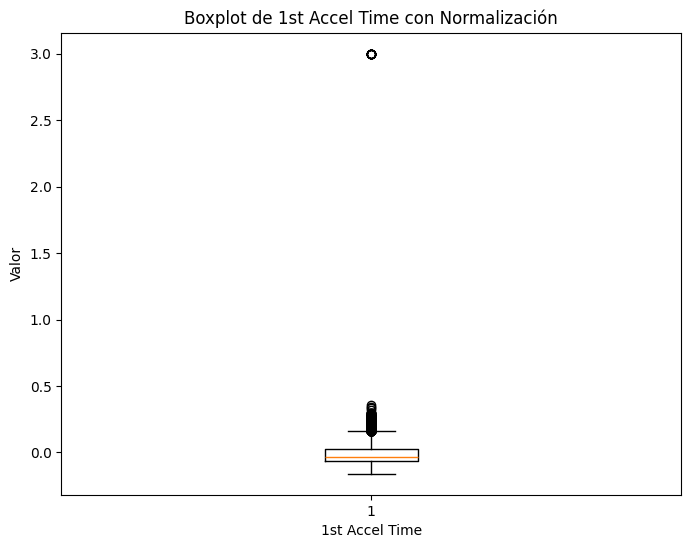

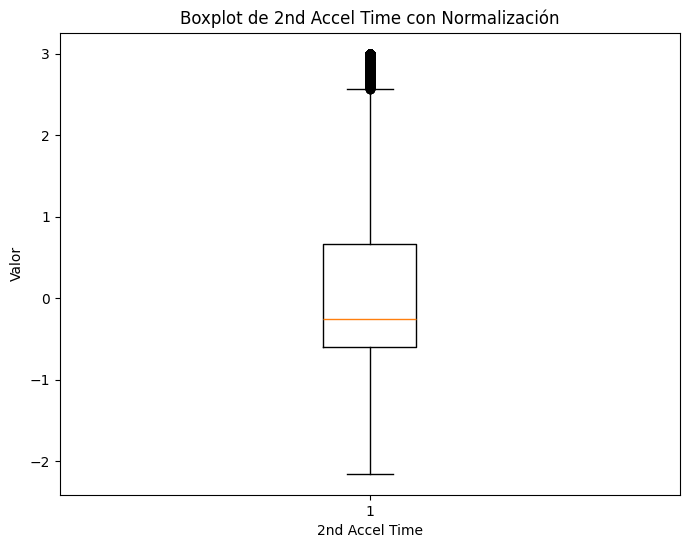

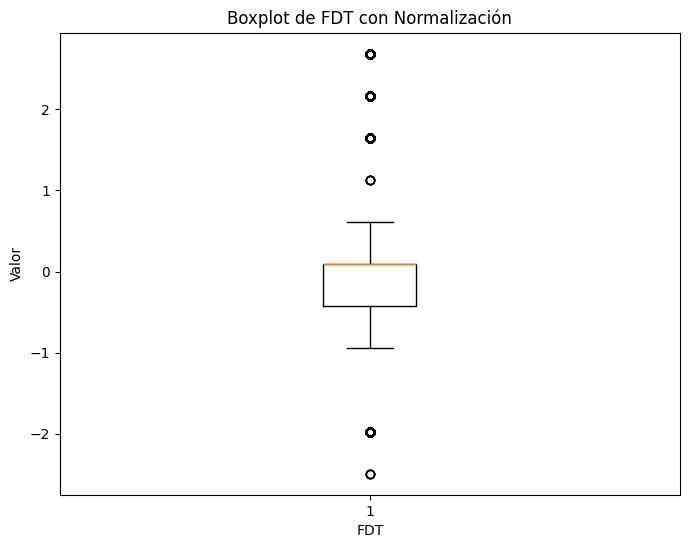

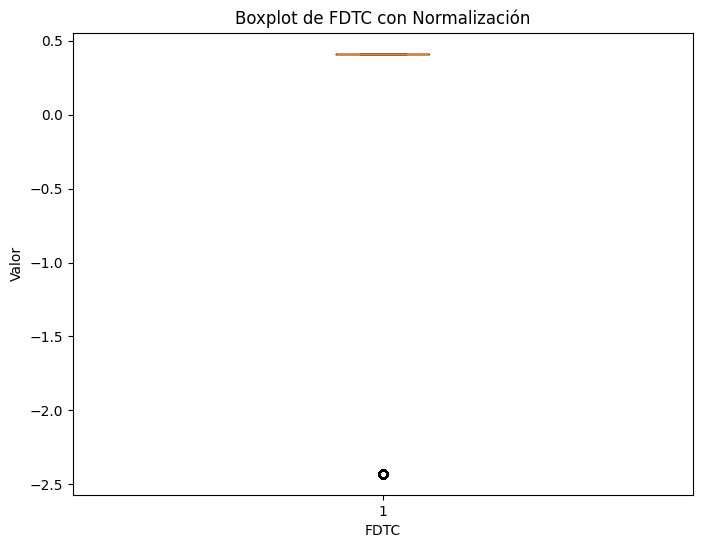

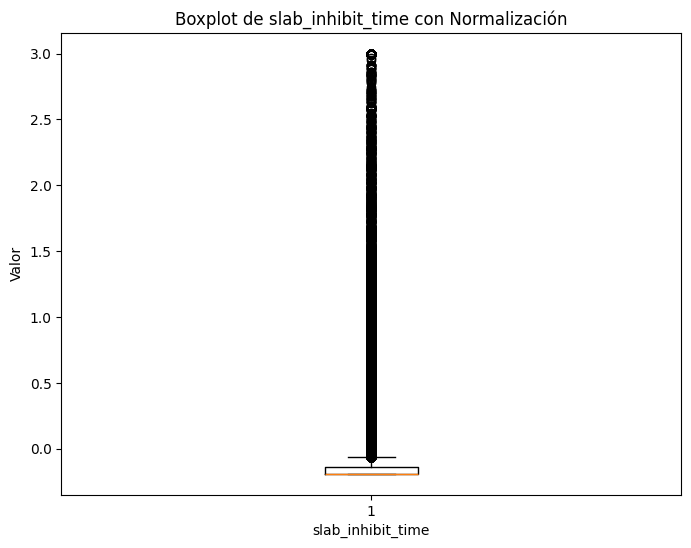

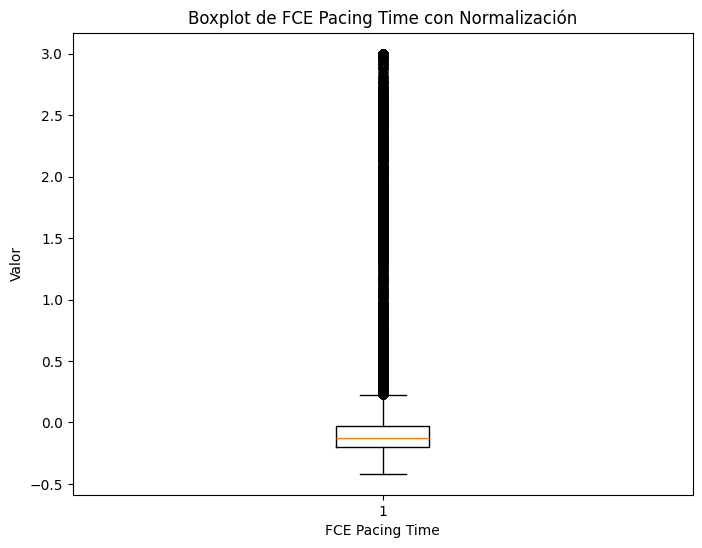

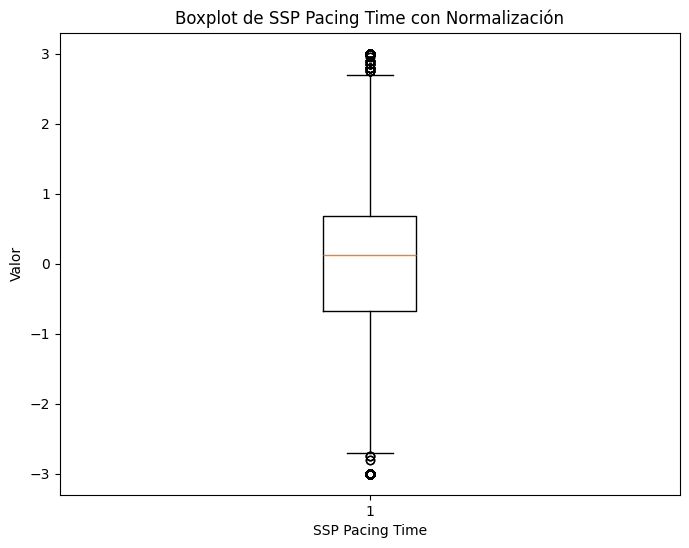

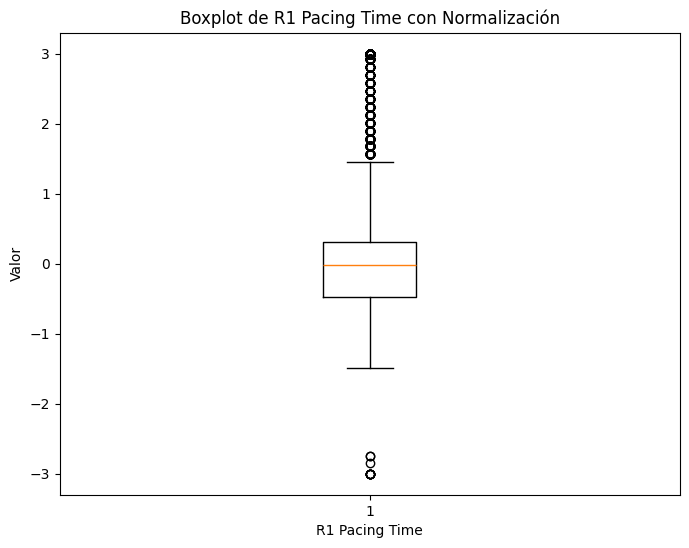

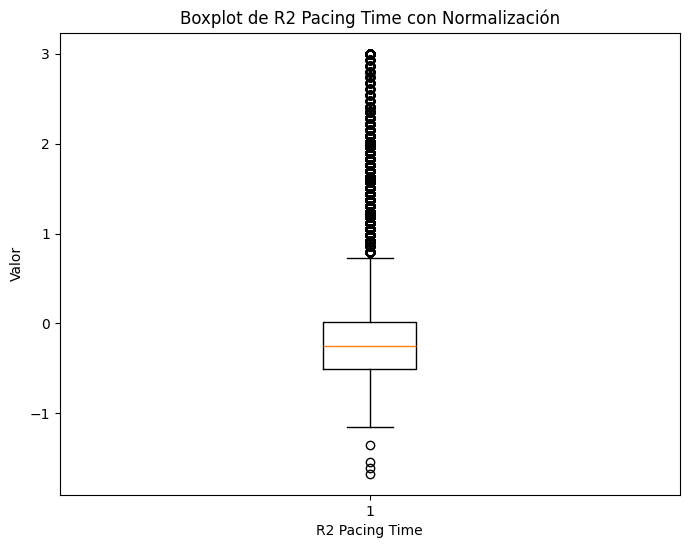

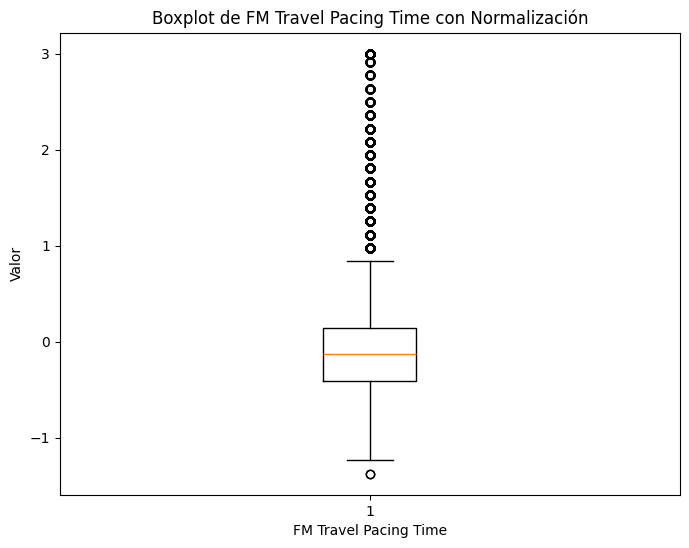

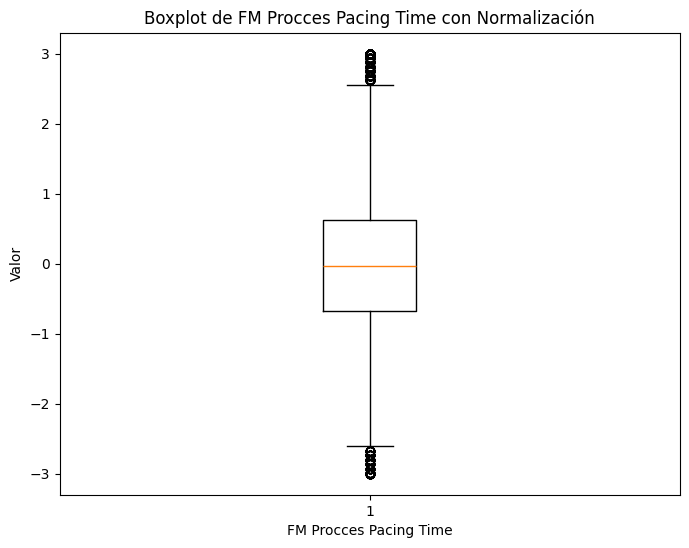

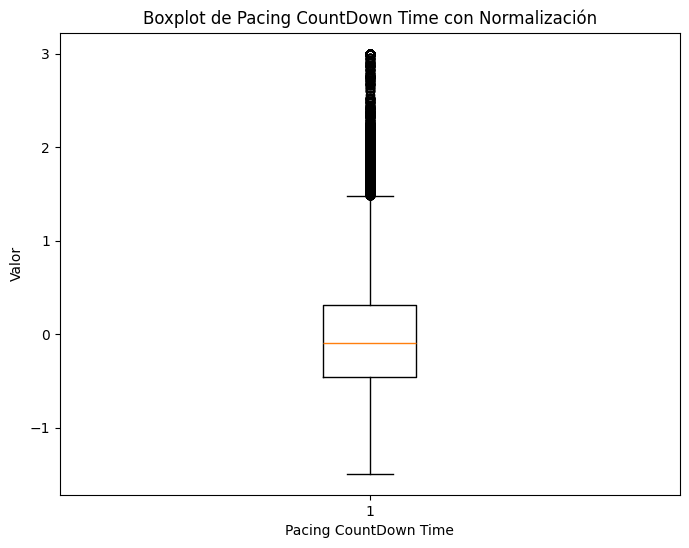

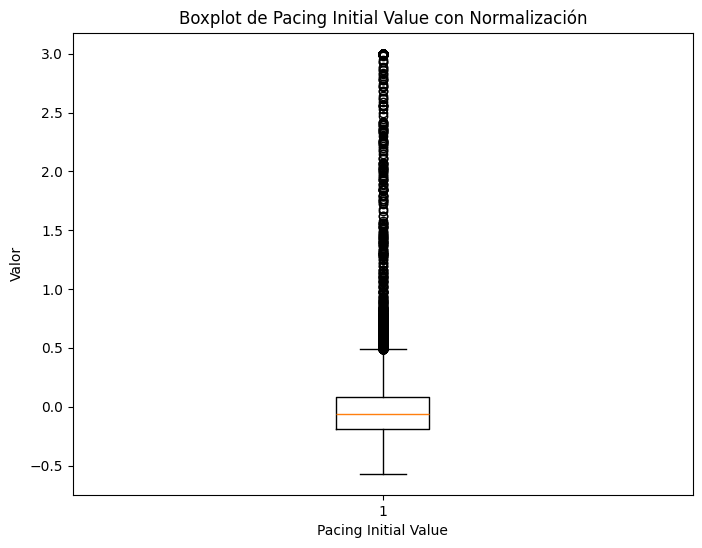

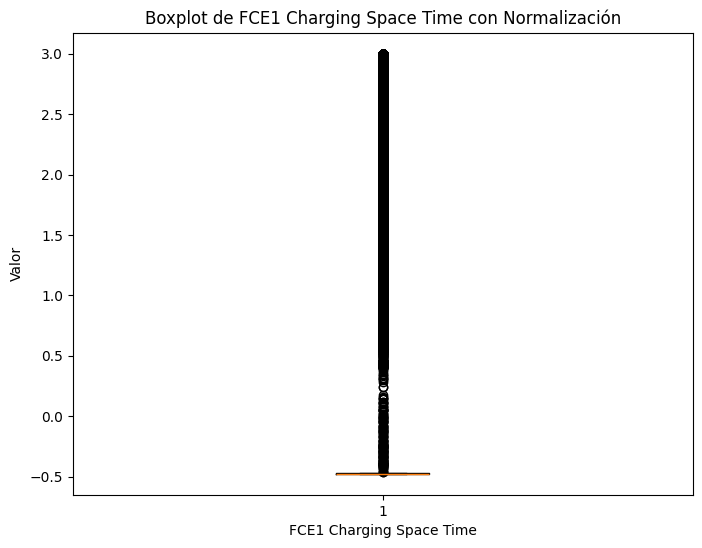

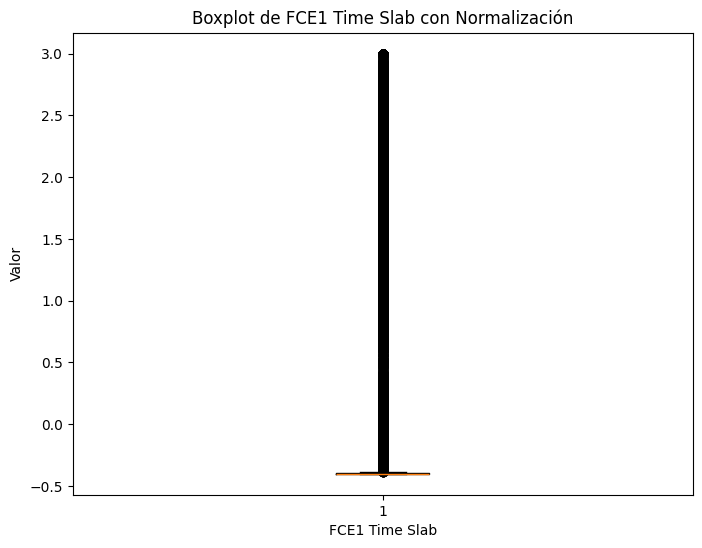

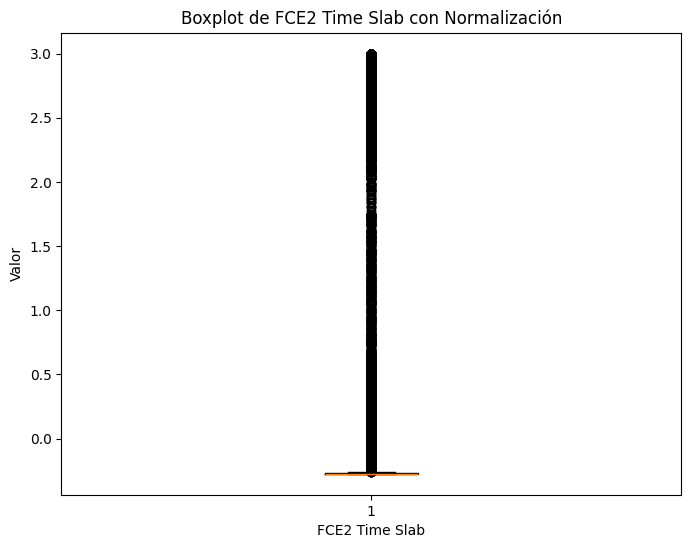

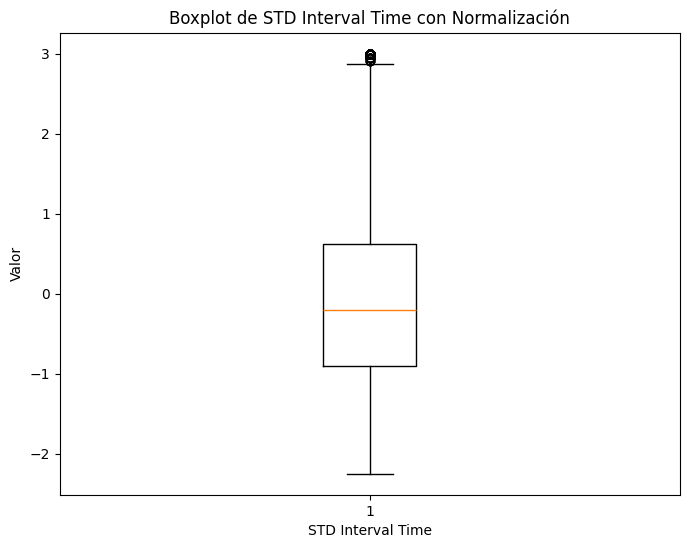

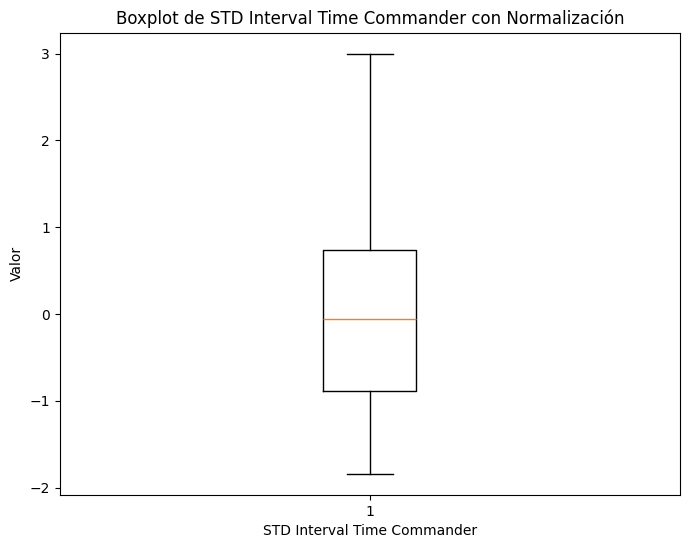

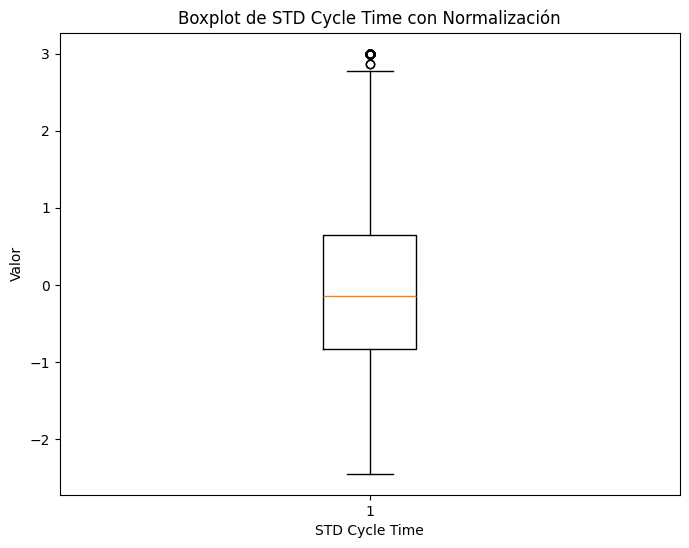

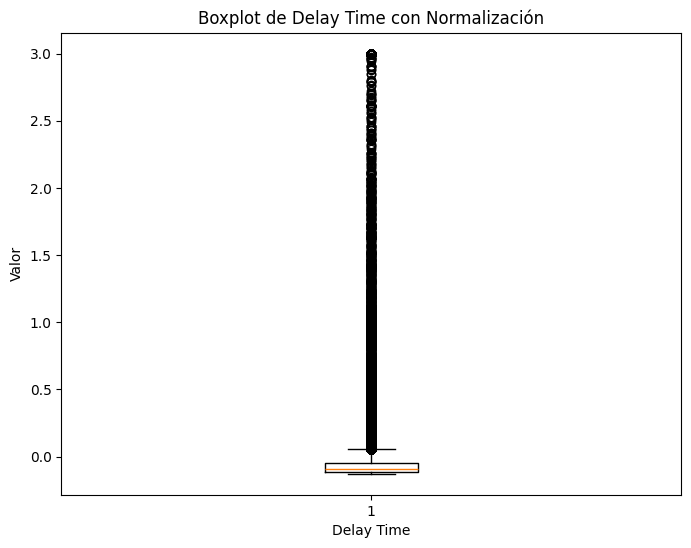

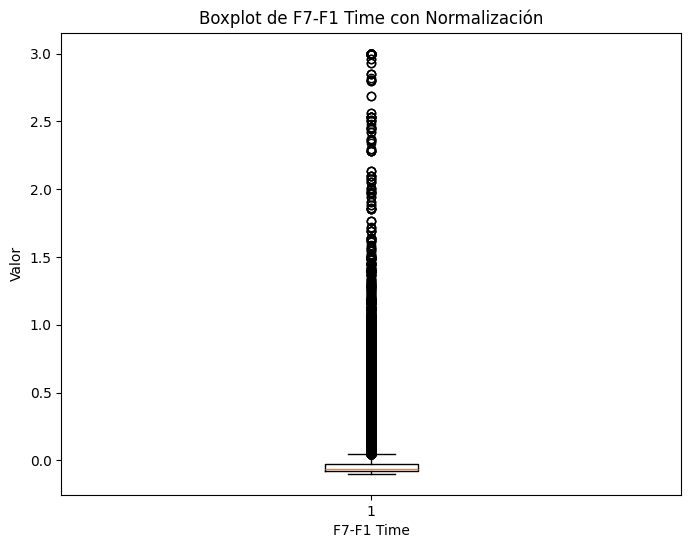

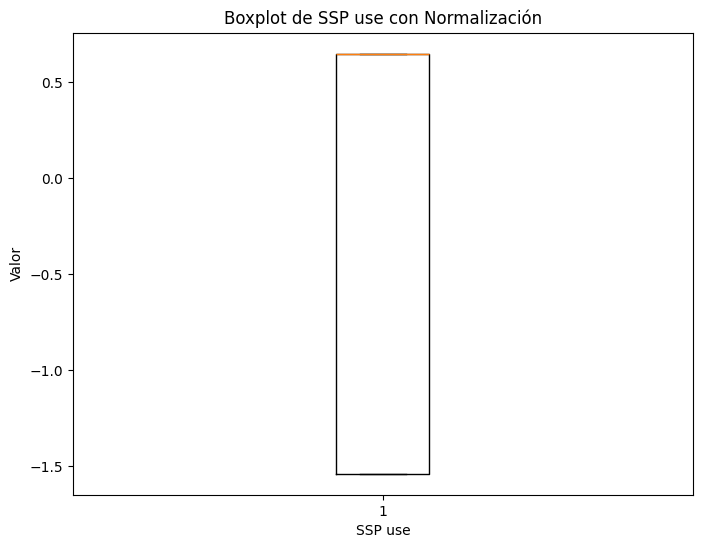

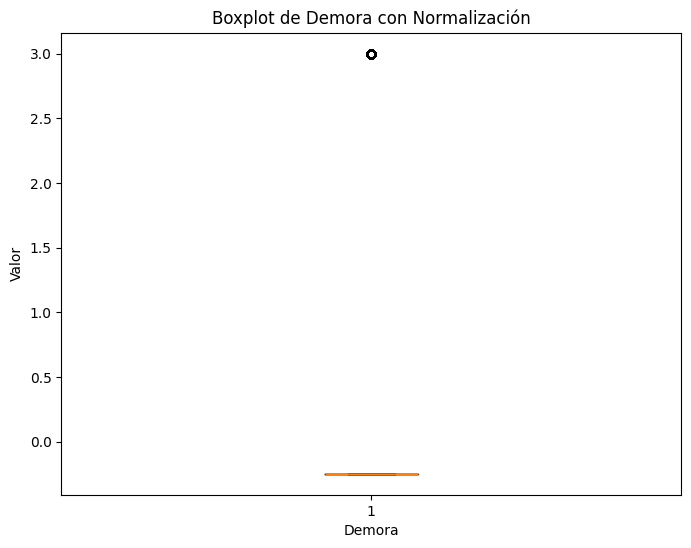

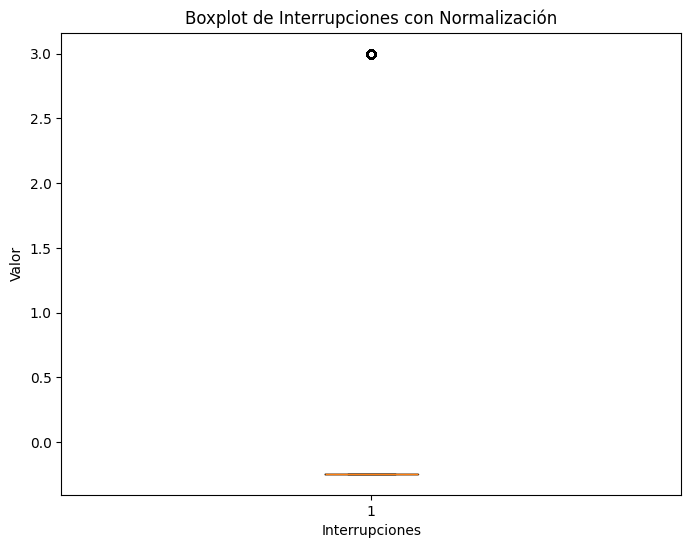

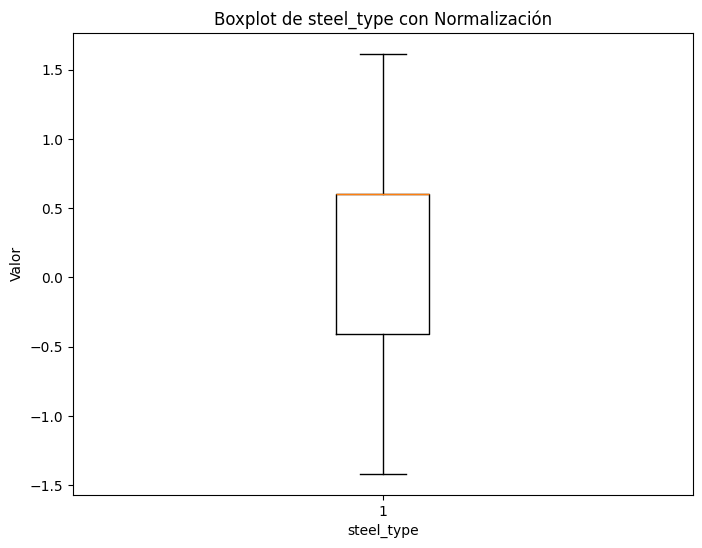

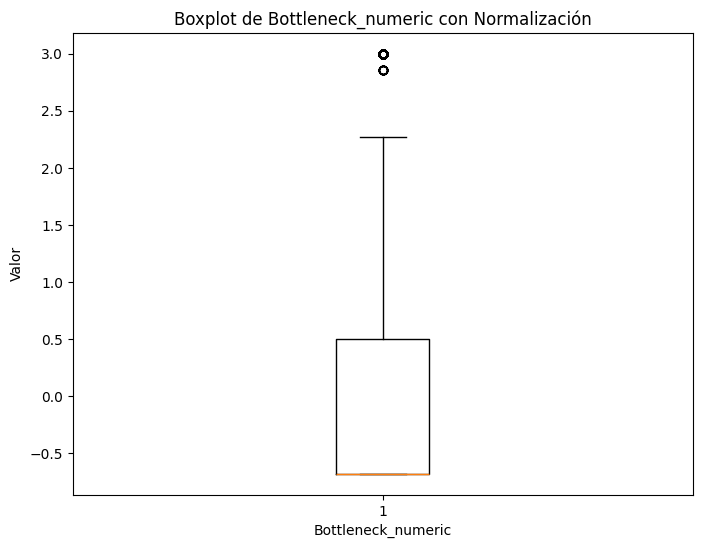

In [6]:
# Obtener los outliers de Normalized_Mean
outliers_normalized = data_normalized[(data_normalized > 3) | (data_normalized < -3)]

# Graficar los outliers para cada columna
for column in outliers_normalized.columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(data_normalized[column])
  plt.title(f"Boxplot de {column} con Normalización")
  plt.xlabel(column)
  plt.ylabel("Valor")

  # Mostrar valores de los outliers en el gráfico
  outliers_column = outliers_normalized[column][outliers_normalized[column].notnull()]
  if not outliers_column.empty:
    plt.scatter(x=[1] * len(outliers_column), y=outliers_column, color='red', label='Outliers')
    plt.legend()

  plt.show()

In [7]:
# Seleccionar solo las columnas numéricas excepto 'interrupciones'
data_numeric = data.select_dtypes(include='number').drop(columns=['Interrupciones', 'Demora', 'FCE Number', 'FDTC', 'SSP use', 'steel_type', 'Bottleneck_numeric'])

# Calcular el IQR y los límites
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Límites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los outliers con NaN en las columnas seleccionadas
data[data_numeric.columns] = data_numeric.mask((data_numeric < lower_bound) | (data_numeric > upper_bound))

# Opcional: Rellenar los NaN resultantes con la mediana de cada columna
data.fillna(data_numeric.median(), inplace=True)

In [8]:
data.head()

,FCE Number,Slab Width,Slab Thickness,Slab Lenght,Slab Weight,slab_width_charge,Commander Slab Speed,PC Width,PC Thickness,PC Length,...,STD Interval Time,STD Interval Time Commander,STD Cycle Time,Delay Time,F7-F1 Time,SSP use,Demora,Interrupciones,steel_type,Bottleneck_numeric
0,2,1580,235.0,7262,20.36,1581.0,21.16,1151.0,222.0,8707.0,...,88.0,47.0,143.8,45.0,25.21,1.0,0,0,1,3
1,1,1579,235.0,7277,20.45,0.0,22.17,1152.0,224.0,11481.0,...,88.0,29.0,143.8,19.0,88.02,1.0,0,0,1,1
2,2,1579,222.0,8705,23.13,0.0,21.93,1151.0,222.0,8707.0,...,92.0,47.0,143.8,31.0,38.09,1.0,0,0,0,1
3,1,1564,235.0,9593,26.89,0.0,21.96,1152.0,224.0,11481.0,...,85.0,29.0,143.8,12.0,50.15,0.0,0,0,1,3
4,2,1562,235.0,8431,23.50,0.0,21.88,1151.0,222.0,8707.0,...,74.0,47.0,143.8,40.0,98.61,0.0,0,0,1,8


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'Interrupciones'
interrupciones_correlations = correlation_matrix['Interrupciones']

# Ordenar las correlaciones de mayor a menor
interrupciones_correlations_sorted = interrupciones_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(interrupciones_correlations_sorted)

Interrupciones                 1.000000
Demora                         0.982578
Bottleneck_numeric             0.118699
FCE Pacing Time                0.087519
Pacing Initial Value           0.077379
Commander Slab Speed           0.077147
Pacing CountDown Time          0.076669
slab_width_charge              0.067680
FCE1 Time Slab                 0.057572
FM Thread Time                 0.046241
FM Travel Pacing Time          0.032504
F7-F1 Time                     0.029752
FDT                            0.029420
Slab Width                     0.024454
FCE2 Time Slab                 0.024325
Taper_Head_Width_Meas          0.024260
Taper_Tail_Width_Meas          0.024156
steel_type                     0.017925
1st Accel Time                 0.017035
SSP Width Head Error           0.016914
SSP Width Tail Error           0.011223
Slab Weight                    0.010243
FCE Number                     0.009766
SSP use                        0.008599
SSP Pacing Time                0.006979


In [10]:
data['Interrupciones'].value_counts()

,count
Interrupciones,
0,53420
1,3175


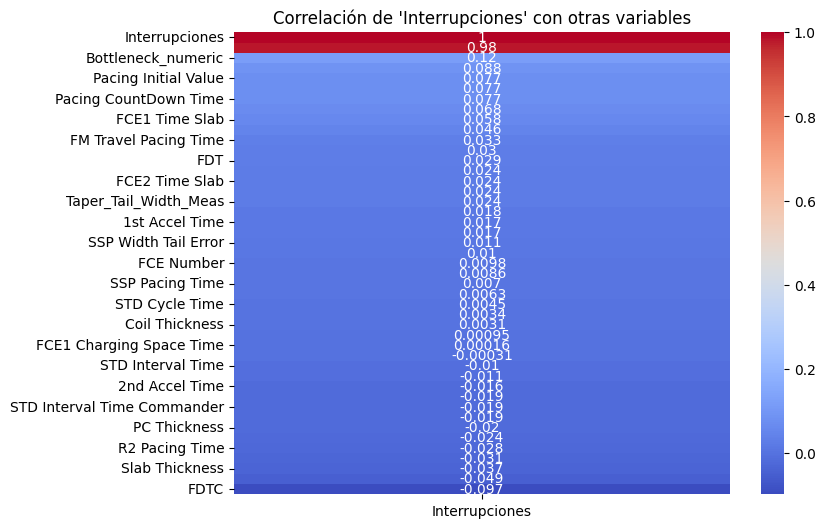

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has calculado 'correlation_matrix'
# Seleccionar solo las correlaciones de 'Interrupciones' y ordenarlas de mayor a menor
correlation_with_interrupciones = correlation_matrix['Interrupciones'].sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un heatmap para mostrar la correlación de 'Interrupciones' con el resto de las variables
sns.heatmap(correlation_with_interrupciones.to_frame(), annot=True, cmap='coolwarm', cbar=True)

# Títulos y etiquetas
plt.title("Correlación de 'Interrupciones' con otras variables")
plt.show()

In [12]:
# value counts de interrupciones
data['Interrupciones'].value_counts()

,count
Interrupciones,
0,53420
1,3175


Construye gráficas que permitan analizar dependencias causales entre las variables.



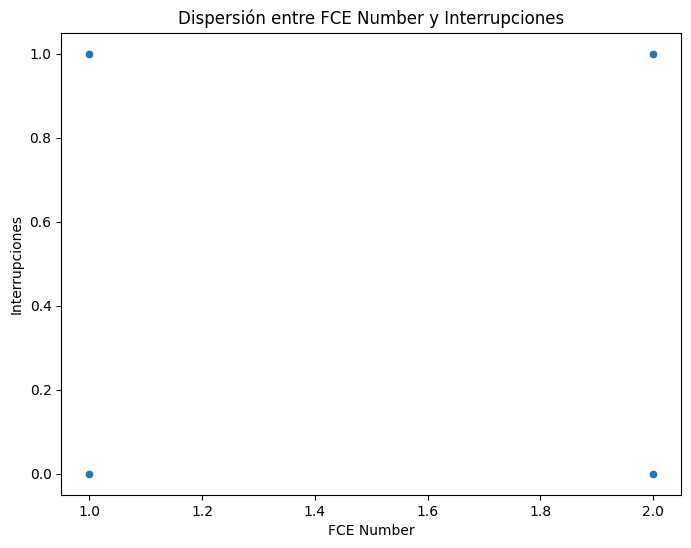

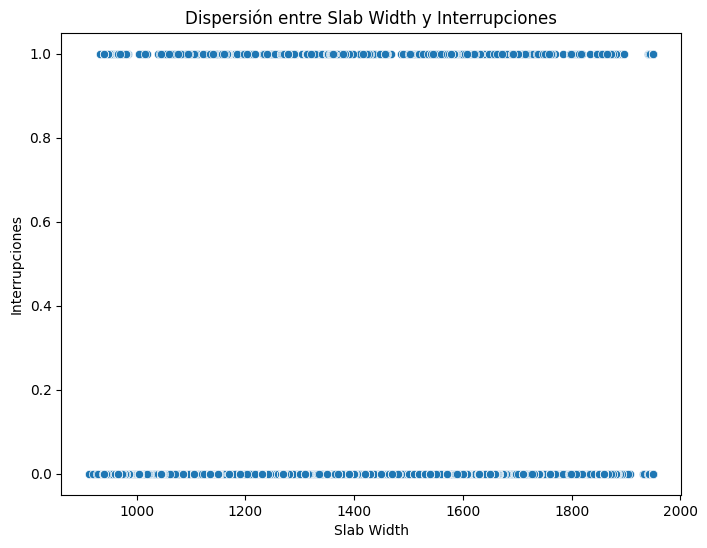

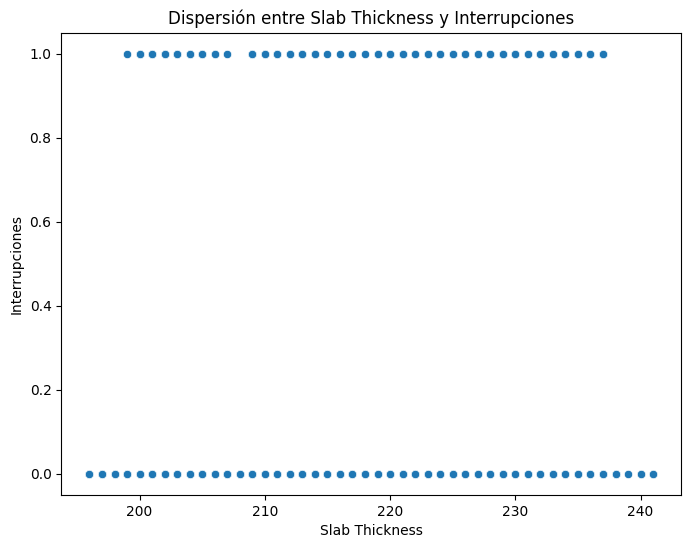

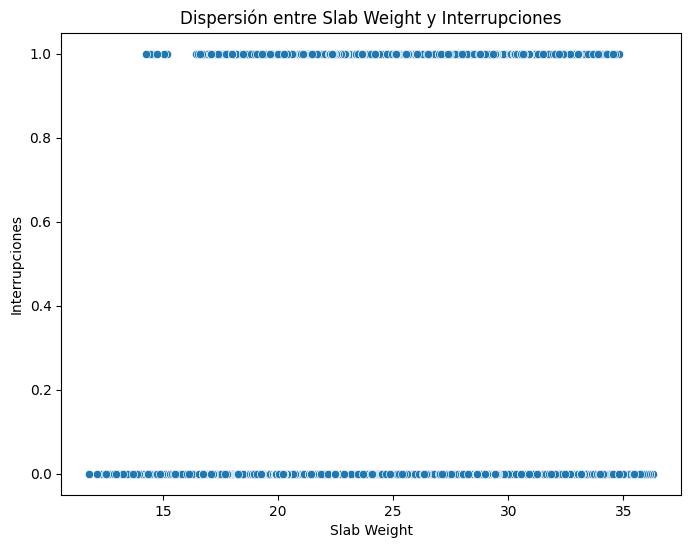

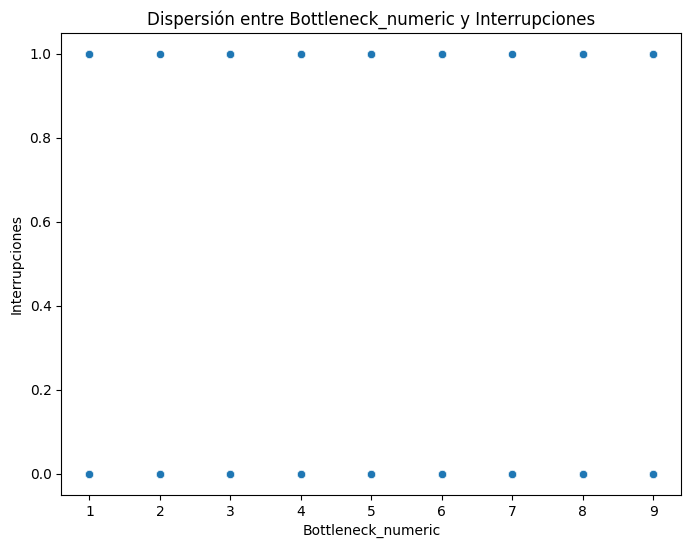

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listar las columnas que se desean analizar contra 'Interrupciones'
variables = ['FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric']  # Ajusta según tus columnas

# Crear gráficos de dispersión para cada variable contra 'Interrupciones'
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=data['Interrupciones'])
    plt.title(f'Dispersión entre {var} y Interrupciones')
    plt.xlabel(var)
    plt.ylabel('Interrupciones')
    plt.show()


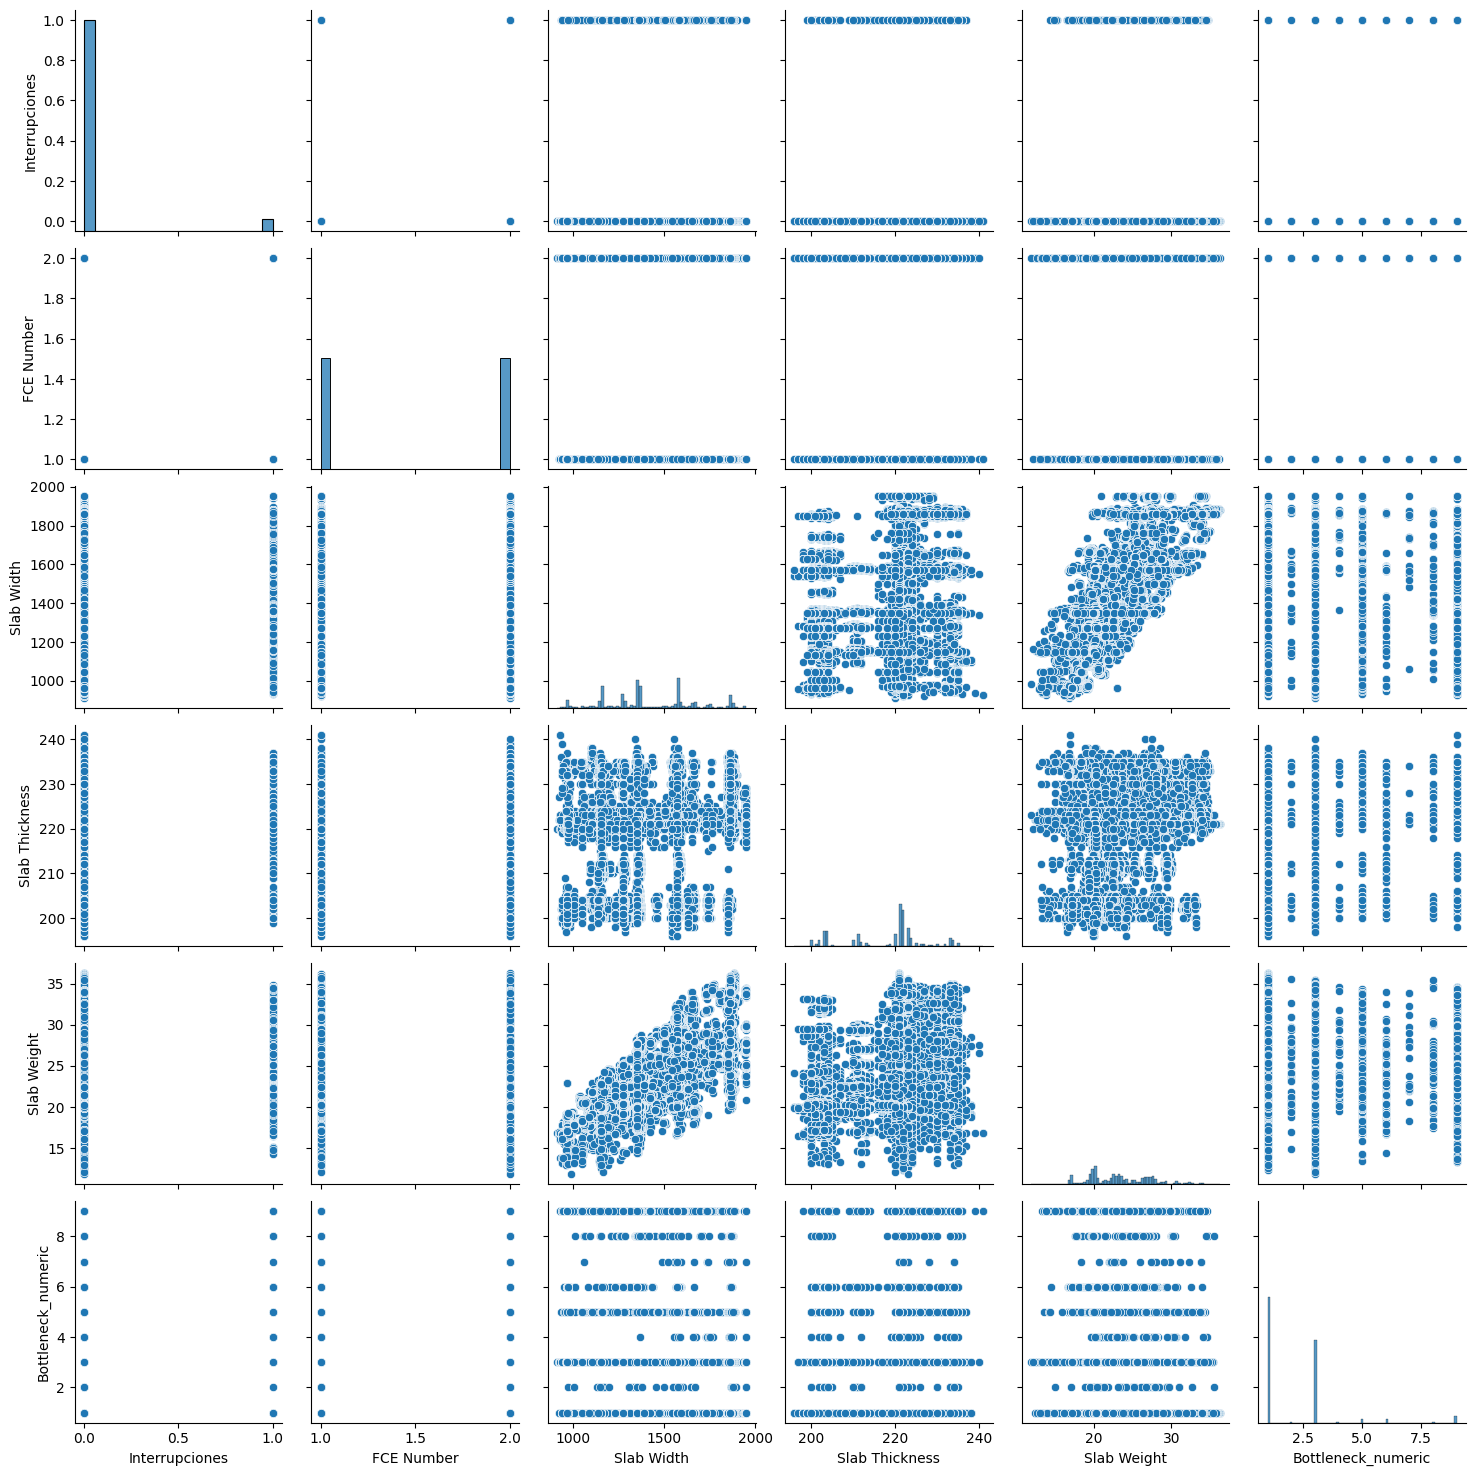

In [14]:
# Crear un gráfico de pares para observar dependencias entre 'Interrupciones' y otras variables
sns.pairplot(data, vars=['Interrupciones', 'FCE Number', 'Slab Width', 'Slab Thickness', 'Slab Weight', 'Bottleneck_numeric'])
plt.show()

# Modelización

In [15]:
data = data[(data['Bottleneck_numeric'] == 3) & (data['Interrupciones'] == 1)]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597 entries, 261 to 51481
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FCE Number                   597 non-null    int64  
 1   Slab Width                   597 non-null    int64  
 2   Slab Thickness               597 non-null    float64
 3   Slab Lenght                  597 non-null    int64  
 4   Slab Weight                  597 non-null    float64
 5   slab_width_charge            597 non-null    float64
 6   Commander Slab Speed         597 non-null    float64
 7   PC Width                     597 non-null    float64
 8   PC Thickness                 597 non-null    float64
 9   PC Length                    597 non-null    float64
 10  Coil Thickness               597 non-null    float64
 11  Taper_Meas                   597 non-null    float64
 12  Taper_Head_Width_Meas        597 non-null    float64
 13  Taper_Tail_Width_Meas

In [17]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer las correlaciones de la variable 'Interrupciones'
FM_correlations = correlation_matrix['FM Thread Time']

# Ordenar las correlaciones de mayor a menor
FM_correlations_sorted = FM_correlations.sort_values(ascending=False)

# Mostrar las correlaciones ordenadas
print(FM_correlations_sorted)


FM Thread Time                 1.000000
1st Accel Time                 0.758685
Coil Thickness                 0.602525
FM Travel Pacing Time          0.536372
STD Interval Time              0.331895
Taper_Tail_Width_Meas          0.296195
Slab Width                     0.295879
Taper_Head_Width_Meas          0.295476
Slab Weight                    0.240864
STD Cycle Time                 0.223061
FM Procces Pacing Time         0.222299
SSP use                        0.221806
Slab Thickness                 0.200264
SSP Pacing Time                0.121125
SSP Width Head Error           0.097000
R1 Pacing Time                 0.063414
PC Length                      0.039964
FCE1 Charging Space Time       0.035474
Taper_Meas                     0.020650
SSP Width Tail Error           0.007708
FCE2 Time Slab                 0.000420
Pacing CountDown Time         -0.004962
Pacing Initial Value          -0.007535
FCE Number                    -0.009023
FCE1 Time Slab                -0.023811


In [18]:
FM_correlations_sorted = FM_correlations.abs().sort_values(ascending=False)
FM_correlations_sorted

,FM Thread Time
FM Thread Time,1.000000
FM Thread Speed,0.812501
1st Accel Time,0.758685
FM Final Speed,0.685728
Coil Thickness,0.602525
FM Travel Pacing Time,0.536372
R2 Pacing Time,0.377180
steel_type,0.350457
FDT,0.348797
STD Interval Time,0.331895


# Modelos de aprendizaje no supervisados

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
file_path = '/content/data_processed.csv'
data1 = pd.read_csv(file_path)

In [21]:
# Seleccionar solo las columnas numéricas del DataFrame
data = data1.select_dtypes(include='number')
#Elimina una columna en data
data = data.drop(columns=['FM Gap Time', 'FCE Waiting Time', 'FCE2 Charging Space Time'])

In [22]:
data = data[data['Bottleneck_numeric']== 3]
data.head()

,FCE Number,Slab Width,Slab Thickness,Slab Lenght,Slab Weight,slab_width_charge,Commander Slab Speed,PC Width,PC Thickness,PC Length,...,STD Interval Time,STD Interval Time Commander,STD Cycle Time,Delay Time,F7-F1 Time,SSP use,Demora,Interrupciones,steel_type,Bottleneck_numeric
0,2,1580,235,7262,20.36,1581.0,22.61,1151.0,222.0,8707.0,...,88.0,47.0,143.80,45.0,25.21,1.0,0,0,1,3
3,1,1564,235,9593,26.89,0.0,21.96,1152.0,224.0,11481.0,...,85.0,29.0,143.80,12.0,50.15,0.0,0,0,1,3
15,1,1744,224,9362,27.79,1161.0,21.40,1152.0,224.0,11481.0,...,86.0,29.0,158.71,45.0,21.10,1.0,0,0,0,3
36,2,1351,224,11478,26.50,0.0,21.38,1151.0,222.0,8707.0,...,43.0,47.0,124.51,17.0,13.46,0.0,0,0,2,3
42,1,1159,204,11191,20.07,1354.0,21.08,1850.0,236.0,7595.0,...,28.0,96.0,102.55,11.0,23.07,1.0,0,0,2,3


In [23]:
# Seleccionar solo las columnas numéricas excepto...
data_numeric = data.select_dtypes(include='number').drop(columns=['Interrupciones', 'Demora', 'FCE Number', 'FDTC', 'SSP use', 'steel_type', 'Bottleneck_numeric'])

# Calcular el IQR y los límites
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1

# Límites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar los outliers con NaN en las columnas seleccionadas
data[data_numeric.columns] = data_numeric.mask((data_numeric < lower_bound) | (data_numeric > upper_bound))

# Opcional: Rellenar los NaN resultantes con la mediana de cada columna
data.fillna(data_numeric.median(), inplace=True)

In [24]:
# Separar los datos (clase 1) y (clase 0)
interrupciones = data[data['Interrupciones'] == 1]
noint = data[data['Interrupciones'] == 0]

# Sobremuestrear la clase minoritaria
data2_oversampled = resample(interrupciones,
                             replace=True,  # Permitir el sobremuestreo con reemplazo
                             n_samples=len(noint),  # Igualar al número de ejemplos de la clase mayoritaria
                             random_state=55)  # Fijar la semilla para reproducibilidad

# Unir los datos balanceados
balanced_data = pd.concat([noint, data2_oversampled])

# Verificar la nueva distribución de las clases
balanced_class_distribution = balanced_data['Interrupciones'].value_counts()
print(balanced_class_distribution)

# Seleccionar solo columnas numéricas
numeric_columns = balanced_data.select_dtypes(include='number').columns

# Separar las características (X) y la variable objetivo (y)
X = balanced_data[numeric_columns].drop(columns=['Interrupciones'], errors='ignore')
y = balanced_data['Interrupciones']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Interrupciones
0    20403
1    20403
Name: count, dtype: int64


#**K-Means**

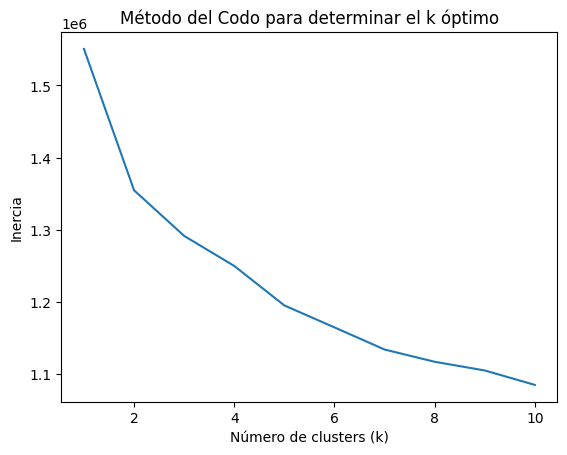

In [25]:
# Modelo K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas excluyendo las columnas categóricas
X_kmeans = balanced_data[numeric_columns].drop(columns=['Interrupciones', 'Demora', 'FCE Number', 'FDTC', 'SSP use', 'steel_type', 'Bottleneck_numeric'], errors='ignore')

# Escalar los datos (esto es importante para algoritmos como KMeans)
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

# Determinar el número óptimo de clusters usando el método del codo
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmeans_scaled)
    sse.append(kmeans.inertia_)  # SSE (suma de los errores al cuadrado)

# Graficar el método del codo
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el k óptimo')
plt.show()


Distribución de los clusters:
Cluster
1    24255
0    16551
Name: count, dtype: int64


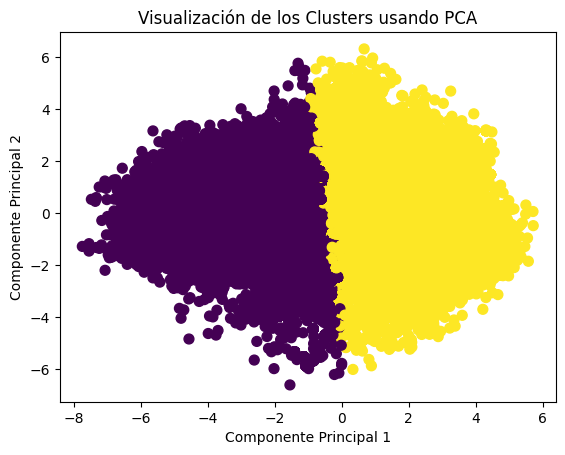

In [26]:
# Elegimos k=2 basados en la gráfica del codo
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_kmeans_scaled)

# Obtener las etiquetas de los clusters
clusters = kmeans.labels_

# Añadir las etiquetas de los clusters al DataFrame original
balanced_data['Cluster'] = clusters

# Ver la distribución de los datos por cluster
cluster_distribution = balanced_data['Cluster'].value_counts()
print("\nDistribución de los clusters:")
print(cluster_distribution)

# Visualizar los clusters (usando PCA para reducir dimensiones)
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2 para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans_scaled)

# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualización de los Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
# Usamos las características escaladas (X_kmeans_scaled) y las etiquetas de los clusters (clusters) obtenidas del modelo K-Means
silhouette_avg = silhouette_score(X_kmeans_scaled, clusters)

# Mostrar el coeficiente de silueta
print(f"Coeficiente de silueta: {silhouette_avg:.4f}")

Coeficiente de silueta: 0.1298


Tabla de contingencia entre clusters e interrupciones:
Interrupciones      0      1
Cluster                     
0                8393   8158
1               12010  12245

Proporción de interrupciones en cada cluster:
Interrupciones         0         1
Cluster                           
0               0.507099  0.492901
1               0.495156  0.504844


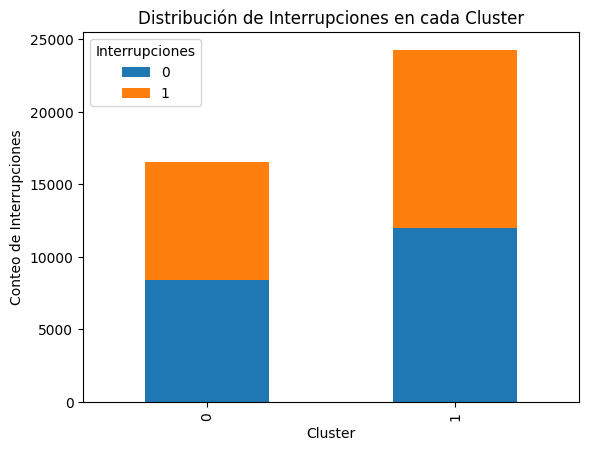

In [28]:
# Crear una tabla de contingencia para comparar los clusters con la variable 'Interrupciones'
contingency_table = pd.crosstab(balanced_data['Cluster'], balanced_data['Interrupciones'])

# Mostrar la tabla de contingencia
print("Tabla de contingencia entre clusters e interrupciones:")
print(contingency_table)



# Calcular las proporciones de interrupciones en cada cluster
proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Mostrar la tabla de proporciones
print("\nProporción de interrupciones en cada cluster:")
print(proportion_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribución de Interrupciones en cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Conteo de Interrupciones')
plt.show()

Tabla de contingencia entre clusters y steel type:
steel_type     0     1      2     3
Cluster                            
+ Tiempo    5722  4619   3633  2577
- Tiempo    3101  4703  14915  1536

Proporción de interrupciones en cada cluster:
steel_type         0         1         2         3
Cluster                                           
+ Tiempo    0.345719  0.279077  0.219503  0.155701
- Tiempo    0.127850  0.193898  0.614925  0.063327


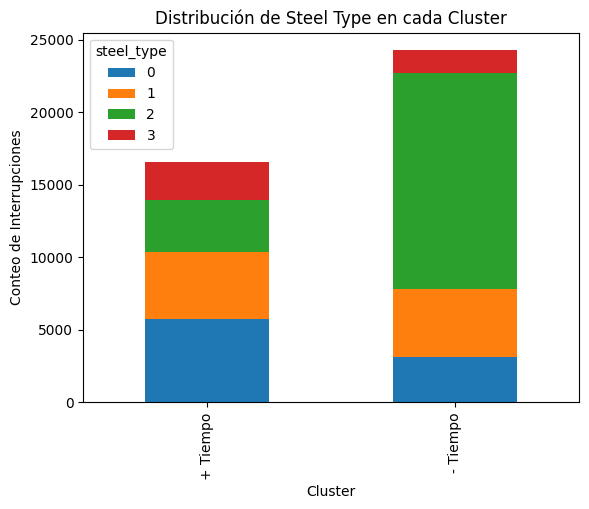

In [29]:
# Crear una tabla de contingencia para comparar los clusters con la variable 'Interrupciones'
contingency_table = pd.crosstab(balanced_data['Cluster'], balanced_data['steel_type'])
contingency_table.rename(index={0: '+ Tiempo', 1: '- Tiempo'}, inplace=True)

# Mostrar la tabla de contingencia
print("Tabla de contingencia entre clusters y steel type:")
print(contingency_table)



# Calcular las proporciones de interrupciones en cada cluster
proportion_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Mostrar la tabla de proporciones
print("\nProporción de interrupciones en cada cluster:")
print(proportion_table)

# Graficar la tabla de contingencia
contingency_table.plot(kind='bar', stacked=True)
plt.title('Distribución de Steel Type en cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Conteo de Interrupciones')
plt.show()

In [30]:
# Obtener estadísticas descriptivas de cada cluster
cluster_summary = balanced_data.groupby('Cluster').mean()

# Mostrar las estadísticas descriptivas de cada cluster
print("Características promedio de cada cluster:")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(cluster_summary)

Características promedio de cada cluster:
         FCE Number   Slab Width  Slab Thickness   Slab Lenght  Slab Weight  \
Cluster                                                                       
0          1.458462  1394.670896      219.979941   9763.320041    23.175319   
1          1.486786  1203.883570      215.025067  10357.071161    20.467246   

         slab_width_charge  Commander Slab Speed     PC Width  PC Thickness  \
Cluster                                                                       
0              1130.581717             21.328232  1465.791614    222.074255   
1              1267.328386             21.392418  1515.617151    222.114987   

           PC Length  Coil Thickness  Taper_Meas  Taper_Head_Width_Meas  \
Cluster                                                                   
0        9654.526192        5.128281   -0.428888            1393.187662   
1        9527.972624        2.849302   -0.553524            1204.247990   

         Taper_Tail_Wid

In [31]:
from scipy.stats import ttest_ind

# Comparar el tiempo de demora entre los dos clusters
delay_time_cluster_0 = balanced_data[balanced_data['Cluster'] == 0]['FM Thread Time']
delay_time_cluster_1 = balanced_data[balanced_data['Cluster'] == 1]['FM Thread Time']

# Realizar la prueba t
t_stat, p_value = ttest_ind(delay_time_cluster_0, delay_time_cluster_1)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 146.37091050950008, P-Value: 0.0


In [32]:
from scipy.stats import ttest_ind

# Comparar el tiempo de demora entre los dos clusters
delay_time_cluster_0 = balanced_data[balanced_data['Cluster'] == 0]['Delay Time']
delay_time_cluster_1 = balanced_data[balanced_data['Cluster'] == 1]['Delay Time']

# Realizar la prueba t
t_stat, p_value = ttest_ind(delay_time_cluster_0, delay_time_cluster_1)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 45.88783937736649, P-Value: 0.0


In [33]:
explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var*100:.2f}% de la varianza explicada")

Componente 1: 17.81% de la varianza explicada
Componente 2: 8.68% de la varianza explicada


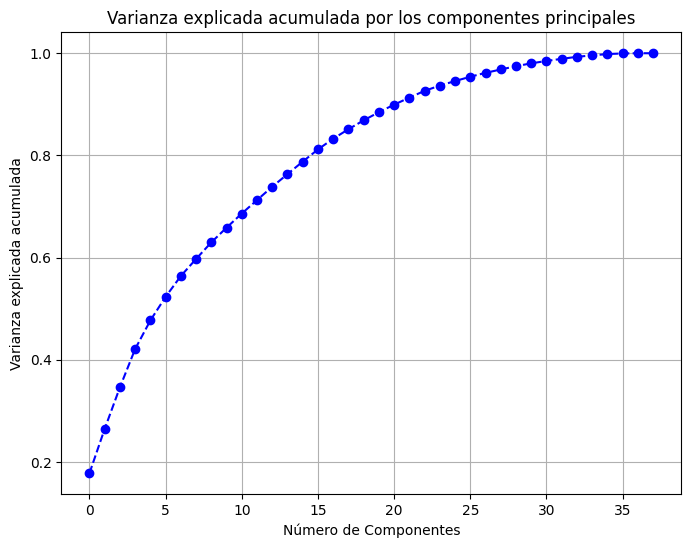

array([0.17814451, 0.26495617, 0.34635073, 0.42123136, 0.47719144,
       0.52335158, 0.56410557, 0.59747757, 0.62990428, 0.65869247,
       0.68630621, 0.71266188, 0.73875455, 0.76346039, 0.78792693,
       0.81173721, 0.83272586, 0.85126412, 0.86865257, 0.88462867,
       0.89933586, 0.91314122, 0.92635376, 0.93671271, 0.94551752,
       0.95400628, 0.96158293, 0.96818928, 0.9746138 , 0.9802125 ,
       0.9848535 , 0.98901119, 0.99298261, 0.99577061, 0.99833993,
       0.99954424, 0.99997385, 1.        ])

In [34]:
# Calcular PCA con todos los componentes
pca_full = PCA().fit(X_kmeans_scaled)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por los componentes principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

# Mostrar la varianza explicada por los primeros componentes
explained_variance_cumsum = np.cumsum(pca_full.explained_variance_ratio_)
explained_variance_cumsum

In [35]:
# Aplicar PCA y mantener suficientes componentes para explicar el 90% de la varianza
pca = PCA(n_components=0.90)  # El 90% de la varianza
df_pca = pca.fit_transform(X_kmeans_scaled)

# Mostrar el número de componentes seleccionados
print(f"Número de componentes seleccionados: {pca.n_components_}")

Número de componentes seleccionados: 22


In [36]:
pca = PCA(n_components=24)
pca.fit(data)

# Obtenemos las variables originales
variables = data.columns

# Iteramos sobre cada componente
for i, component in enumerate(pca.components_):
    print(f"Componente {i+1}:")

    # Ordenamos las variables según su peso en el componente (de mayor a menor peso absoluto)
    sorted_indices = abs(component).argsort()[::-1]  # Índices ordenados por magnitud de peso (mayor a menor)

    # Mostramos las 5 variables con mayor peso (puedes ajustar este número si lo prefieres)
    for idx in sorted_indices[:5]:  # Solo las primeras 5 variables con mayor peso absoluto
        print(f"  {variables[idx]}: {component[idx]:.4f}")  # Muestra el peso original (positivo o negativo)

    print("\n")  # Espacio entre componentes

Componente 1:
  PC Length: 0.9948
  PC Width: -0.0765
  slab_width_charge: -0.0634
  Slab Lenght: 0.0173
  STD Interval Time Commander: -0.0095


Componente 2:
  Slab Lenght: 0.9949
  Slab Width: -0.0491
  Taper_Head_Width_Meas: -0.0489
  Taper_Tail_Width_Meas: -0.0488
  slab_width_charge: 0.0456


Componente 3:
  slab_width_charge: 0.9939
  PC Length: 0.0695
  PC Width: 0.0644
  Slab Lenght: -0.0486
  Taper_Head_Width_Meas: -0.0158


Componente 4:
  Slab Width: 0.5727
  Taper_Head_Width_Meas: 0.5688
  Taper_Tail_Width_Meas: 0.5680
  PC Width: -0.1182
  Slab Lenght: 0.0854


Componente 5:
  PC Width: 0.9845
  STD Interval Time Commander: 0.0739
  Taper_Head_Width_Meas: 0.0718
  Slab Width: 0.0715
  Taper_Tail_Width_Meas: 0.0714


Componente 6:
  FCE Pacing Time: 0.5867
  Pacing CountDown Time: 0.5666
  Pacing Initial Value: 0.5500
  F7-F1 Time: 0.1153
  SSP Pacing Time: -0.0873


Componente 7:
  Slab Width: 0.8136
  Taper_Head_Width_Meas: -0.4128
  Taper_Tail_Width_Meas: -0.4078
  SSP 

#**Isolation Forest**

In [37]:
from sklearn.ensemble import IsolationForest
# Convertir el array de PCA en DataFrame para facilitar el manejo
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Entrenar el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_pca_df['anomaly'] = iso_forest.fit_predict(df_pca_df)  # -1 es anomalía, 1 es no-anomalía

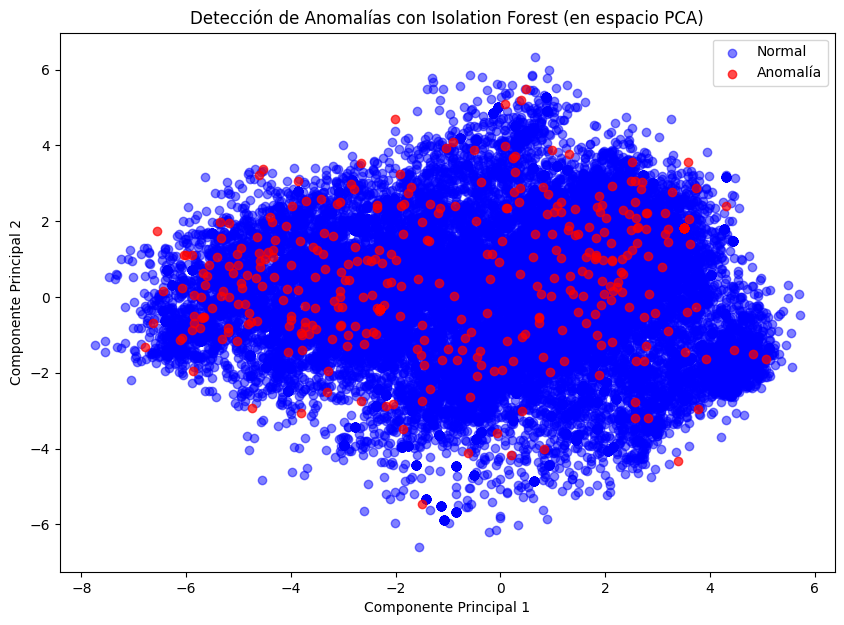

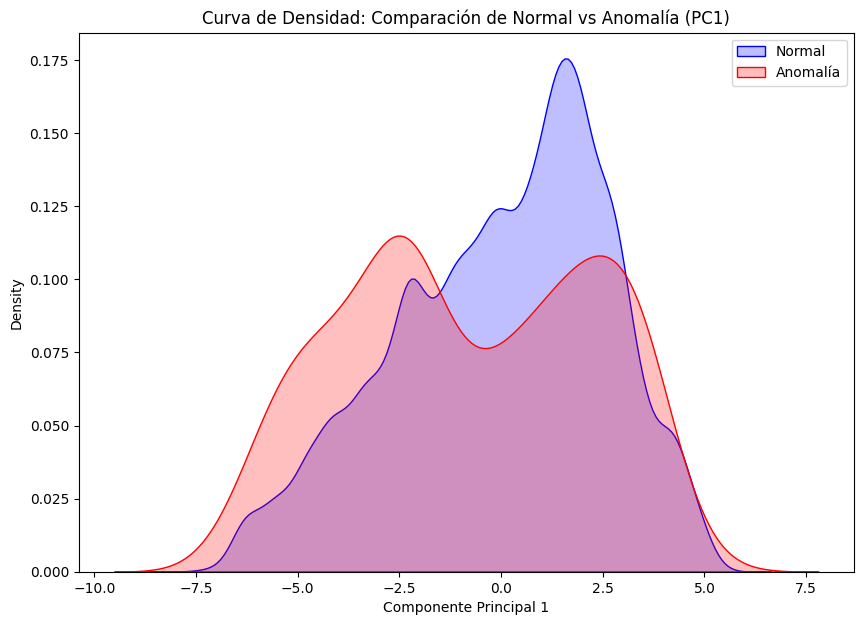

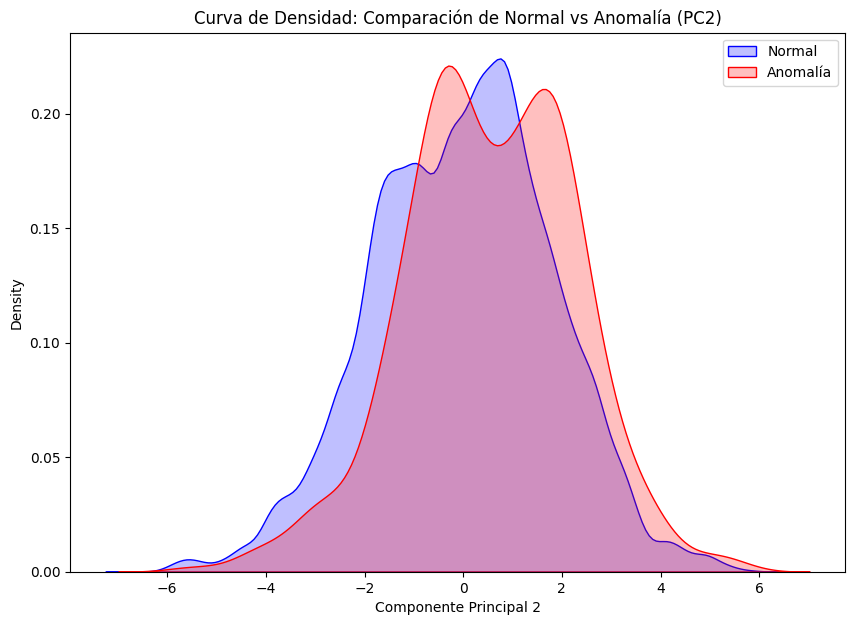

In [38]:
# Agregar una columna para indicar las anomalías
df_pca_df['is_anomaly'] = df_pca_df['anomaly'] == -1

# Visualizar anomalías sobre los componentes principales
plt.figure(figsize=(10, 7))
plt.scatter(df_pca_df[df_pca_df['is_anomaly'] == False]['PC1'], df_pca_df[df_pca_df['is_anomaly'] == False]['PC2'],
            c='blue', label='Normal', alpha=0.5)
plt.scatter(df_pca_df[df_pca_df['is_anomaly'] == True]['PC1'], df_pca_df[df_pca_df['is_anomaly'] == True]['PC2'],
            c='red', label='Anomalía', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Detección de Anomalías con Isolation Forest (en espacio PCA)')
plt.legend()
plt.show()


import seaborn as sns

# Visualización de densidad para el primer componente principal (PC1)
plt.figure(figsize=(10, 7))
sns.kdeplot(df_pca_df[df_pca_df['is_anomaly'] == False]['PC1'], color='blue', label='Normal', fill=True)
sns.kdeplot(df_pca_df[df_pca_df['is_anomaly'] == True]['PC1'], color='red', label='Anomalía', fill=True)
plt.xlabel('Componente Principal 1')
plt.title('Curva de Densidad: Comparación de Normal vs Anomalía (PC1)')
plt.legend()
plt.show()

# Visualización de densidad para el segundo componente principal (PC2)
plt.figure(figsize=(10, 7))
sns.kdeplot(df_pca_df[df_pca_df['is_anomaly'] == False]['PC2'], color='blue', label='Normal', fill=True)
sns.kdeplot(df_pca_df[df_pca_df['is_anomaly'] == True]['PC2'], color='red', label='Anomalía', fill=True)
plt.xlabel('Componente Principal 2')
plt.title('Curva de Densidad: Comparación de Normal vs Anomalía (PC2)')
plt.legend()
plt.show()

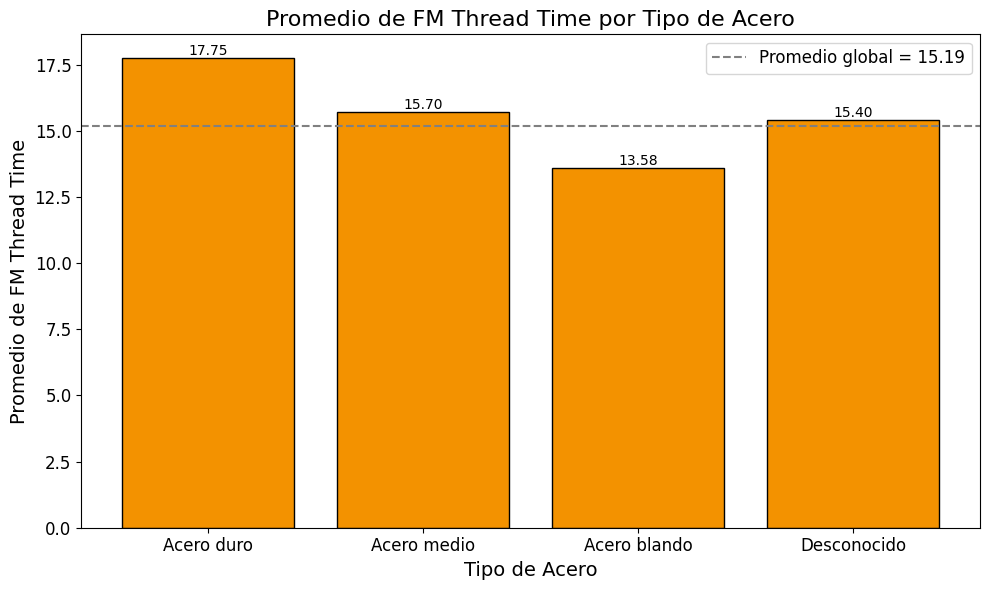

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'steel_type' y calcular el promedio de 'FM Thread Time'
grouped_data = data.groupby('steel_type')['FM Thread Time'].mean().reset_index()

# Calcular el promedio global de 'FM Thread Time'
global_avg = data['FM Thread Time'].mean()

# Crear un diccionario para las etiquetas personalizadas del eje X
steel_type_labels = {
    2: 'Acero blando',
    0: 'Acero duro',
    1: 'Acero medio',
    3: 'Desconocido'
}

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(
    grouped_data['steel_type'],  # Categorías del eje X
    grouped_data['FM Thread Time'],  # Valores promedio
    color='#F39200',  # Color de las barras
    edgecolor='black'  # Contorno de las barras
)

# Agregar etiquetas sobre cada barra
for bar in bars:
    height = bar.get_height()  # Obtener la altura de la barra
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posición X (centro de la barra)
        height,  # Posición Y (altura de la barra)
        f'{height:.2f}',  # Texto (valor con 2 decimales)
        ha='center',  # Alineación horizontal
        va='bottom',  # Alineación vertical
        fontsize=10  # Tamaño de la fuente
    )

# Agregar una línea punteada para el promedio global
plt.axhline(
    y=global_avg,  # Posición de la línea
    color='gray',  # Color de la línea
    linestyle='--',  # Línea punteada
    linewidth=1.5,  # Grosor de la línea
    label=f'Promedio global = {global_avg:.2f}'  # Etiqueta de la línea
)

# Personalización de la gráfica
plt.xlabel('Tipo de Acero', fontsize=14)
plt.ylabel('Promedio de FM Thread Time', fontsize=14)
plt.title('Promedio de FM Thread Time por Tipo de Acero', fontsize=16)

# Configurar el eje X para mostrar etiquetas personalizadas
plt.xticks(
    ticks=grouped_data['steel_type'],  # Posiciones de los ticks
    labels=[steel_type_labels[stype] for stype in grouped_data['steel_type']],  # Etiquetas personalizadas
    fontsize=12
)

# Configuración adicional del eje Y
plt.yticks(fontsize=12)

# Mostrar la leyenda
plt.legend(fontsize=12)

# Ajustar el diseño para evitar cortes
plt.tight_layout()

# Mostrar la gráfica
plt.show()

